In [172]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import math
from scipy.stats import t
from scipy.stats import uniform
%matplotlib inline
%run ./master_experminet-functions.ipynb
# load functions for the creation of the different distributions

In [173]:
# define arms
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [174]:
n_samples = 100000
choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quick_sort","merge_sort","heap_sort"]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf"]

In [175]:
list_distributions = 1000*["Uniform_Sorted"] + 1000*["Normal"] # at first quick sort -> then merge sort 
#list_distributions = 500*["Uniform"] + 500*["Normal"]+ 500*["Uniform_Sorted"]+500*["Uniform_Reverse_Sorted"]
list_distributions_1 = 1000*["Uniform"] + 1000*["Normal"] # quick sort should be faster 
list_distributions_2 = 1000*["Uniform_Sorted"]+1000*["Uniform_Reverse_Sorted"] # merge sort should be faster

In [176]:
def plot_history(rewards,cum_rewards,chosen_arms ):

    fig = plt.figure(figsize=[30,8])
    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards")
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms.values()))], chosen_arms.values(), label=[i for i in ((list(chosen_arms.keys())))])
    ax3.set_title("Chosen Actions")

## Thompson Sampling

# Probabs sampled from t Student distribution

In [177]:
a = 5
b = [1,2,3]
c = sum([(a-i)**2 for i in b])
c

29

### Quick sort should be the fastest

In [179]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 1000


for n, elem in enumerate(list_distributions_1):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1)))
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice]/(sample_count[choice]-1))
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 

print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.12686860447763326
Less than two values for merge_sort
merge_sort Theta 0.546081258615242
Less than two values for heap_sort
heap_sort Theta 0.3242264439244327
Chosen algorithm is:  quick_sort with reward: 0.0169522762298584
Sample mean is:  0.0169522762298584 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.5230701146443436
Less than two values for merge_sort
merge_sort Theta 0.8848031811173974
Less than two values for heap_sort
heap_sort Theta 0.10817893096417486
Chosen algorithm is:  heap_sort with reward: 0.022942304611206055
Sample mean is:  0.022942304611206055 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.4154740922180994
Less than two values for merge_sort
merge_sort Theta 0.3133271425830978
Less than two values for heap_sort
heap_sort Theta 0.1574012963709187
Chosen algorithm is:  heap_sort with reward: 0.022938251495

Sample mean is:  0.023415516162740773 Sample variance is: 0.0032849181097329623


Iteration: 30
Less than two values for quick_sort
quick_sort Theta 0.8300456557097922
Less than two values for merge_sort
merge_sort Theta 0.29414007299741296
heap_sort Theta 0.023389818776826013
Chosen algorithm is:  heap_sort with reward: 0.03589582443237305
Sample mean is:  0.023831526438395183 Sample variance is: 0.008363581554968032


Iteration: 31
Less than two values for quick_sort
quick_sort Theta 0.40144725152938665
Less than two values for merge_sort
merge_sort Theta 0.9860846017262088
heap_sort Theta 0.0239332220080947
Chosen algorithm is:  heap_sort with reward: 0.03490710258483887
Sample mean is:  0.02418880308828046 Sample variance is: 0.012041840244286485


Iteration: 32
Less than two values for quick_sort
quick_sort Theta 0.7710726380478656
Less than two values for merge_sort
merge_sort Theta 0.9240245265941611
heap_sort Theta 0.024242769802756758
Chosen algorithm is:  heap_sort with rewar

Chosen algorithm is:  merge_sort with reward: 0.016958236694335938
Sample mean is:  0.01635570526123047 Sample variance is: 0.0002996819546297047


Iteration: 56
Less than two values for quick_sort
quick_sort Theta 0.9662566466022111
merge_sort Theta 0.016424388087600807
heap_sort Theta 0.025079001963273156
Chosen algorithm is:  merge_sort with reward: 0.018950462341308594
Sample mean is:  0.016788164774576824 Sample variance is: 0.0013618729478063567


Iteration: 57
Less than two values for quick_sort
quick_sort Theta 0.24389411181033904
merge_sort Theta 0.01649199642766336
heap_sort Theta 0.02437527296337386
Chosen algorithm is:  merge_sort with reward: 0.01598811149597168
Sample mean is:  0.0166738714490618 Sample variance is: 0.001226334872972941


Iteration: 58
Less than two values for quick_sort
quick_sort Theta 0.6079190525683396
merge_sort Theta 0.016855733931074444
heap_sort Theta 0.02465034836882056
Chosen algorithm is:  merge_sort with reward: 0.013997077941894531
Sample mea

Chosen algorithm is:  merge_sort with reward: 0.017955303192138672
Sample mean is:  0.016288189327015597 Sample variance is: 0.0035258994909709764


Iteration: 85
Less than two values for quick_sort
quick_sort Theta 0.6814947743501895
merge_sort Theta 0.016306900697125093
heap_sort Theta 0.024930044209104368
Chosen algorithm is:  merge_sort with reward: 0.014988183975219727
Sample mean is:  0.016251046316964286 Sample variance is: 0.003470482676614459


Iteration: 86
Less than two values for quick_sort
quick_sort Theta 0.5448265572255704
merge_sort Theta 0.016215107538242575
heap_sort Theta 0.024796202174606173
Chosen algorithm is:  merge_sort with reward: 0.014963388442993164
Sample mean is:  0.01621527804268731 Sample variance is: 0.003417383328722295


Iteration: 87
Less than two values for quick_sort
quick_sort Theta 0.0625916907118571
merge_sort Theta 0.016192474072220943
heap_sort Theta 0.02512961600927123
Chosen algorithm is:  merge_sort with reward: 0.014960050582885742
Sample 

heap_sort Theta 0.025136078368897526
Chosen algorithm is:  merge_sort with reward: 0.019983291625976562
Sample mean is:  0.015874444521390474 Sample variance is: 0.0025698877888494028


Iteration: 117
quick_sort Theta 0.017001737287458844
merge_sort Theta 0.015859579184021772
heap_sort Theta 0.025021343550837873
Chosen algorithm is:  merge_sort with reward: 0.015985965728759766
Sample mean is:  0.015876134236653645 Sample variance is: 0.0025305394927225924


Iteration: 118
quick_sort Theta 0.012467477992967137
merge_sort Theta 0.015772585407384528
heap_sort Theta 0.025691953419960695
Chosen algorithm is:  quick_sort with reward: 0.011997699737548828
Sample mean is:  0.013973156611124674 Sample variance is: 0.006892461234050036


Iteration: 119
quick_sort Theta 0.012498674104706469
merge_sort Theta 0.015910804494487833
heap_sort Theta 0.025135424580309155
Chosen algorithm is:  quick_sort with reward: 0.014962911605834961
Sample mean is:  0.014220595359802246 Sample variance is: 0.004839



Iteration: 148
quick_sort Theta 0.013536745893699341
merge_sort Theta 0.015885391594781133
heap_sort Theta 0.025020711017648488
Chosen algorithm is:  quick_sort with reward: 0.01396322250366211
Sample mean is:  0.013594165444374084 Sample variance is: 0.000811594179732501


Iteration: 149
quick_sort Theta 0.013592779295788818
merge_sort Theta 0.015855629231580518
heap_sort Theta 0.025170562087400733
Chosen algorithm is:  quick_sort with reward: 0.011997699737548828
Sample mean is:  0.01354578769568241 Sample variance is: 0.0008634652783755292


Iteration: 150
quick_sort Theta 0.013536378641668416
merge_sort Theta 0.01592573665646921
heap_sort Theta 0.024532891711622068
Chosen algorithm is:  quick_sort with reward: 0.01396632194519043
Sample mean is:  0.013558156350079705 Sample variance is: 0.0008425011066736909


Iteration: 151
quick_sort Theta 0.01358720621871872
merge_sort Theta 0.015898753648301983
heap_sort Theta 0.024612065787074287
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.012984275817871094
Sample mean is:  0.01366900262378511 Sample variance is: 0.0010717740928857513


Iteration: 180
quick_sort Theta 0.013677658731402375
merge_sort Theta 0.01587882767242972
heap_sort Theta 0.024998024106493693
Chosen algorithm is:  quick_sort with reward: 0.01399087905883789
Sample mean is:  0.01367403194308281 Sample variance is: 0.0010563806250633745


Iteration: 181
quick_sort Theta 0.013691647936746104
merge_sort Theta 0.015900242703515935
heap_sort Theta 0.025196268324777612
Chosen algorithm is:  quick_sort with reward: 0.012993574142456055
Sample mean is:  0.013663563361534705 Sample variance is: 0.0010469981057726634


Iteration: 182
quick_sort Theta 0.013676352739984323
merge_sort Theta 0.015846349911469198
heap_sort Theta 0.024495968594059638
Chosen algorithm is:  quick_sort with reward: 0.012993335723876953
Sample mean is:  0.01365340839732777 Sample variance is: 0.001037696580277844


Iteration: 183
quick_sort 

Chosen algorithm is:  quick_sort with reward: 0.016924619674682617
Sample mean is:  0.013693076685855263 Sample variance is: 0.0009316275229183955


Iteration: 212
quick_sort Theta 0.013684264736973335
merge_sort Theta 0.01591391761229986
heap_sort Theta 0.0257224383463424
Chosen algorithm is:  quick_sort with reward: 0.013964653015136719
Sample mean is:  0.013695905605951944 Sample variance is: 0.0009225891851496777


Iteration: 213
quick_sort Theta 0.013682554790693564
merge_sort Theta 0.015917814751374798
heap_sort Theta 0.024583116223023713
Chosen algorithm is:  quick_sort with reward: 0.013963699340820312
Sample mean is:  0.013698666366105228 Sample variance is: 0.0009137181954102259


Iteration: 214
quick_sort Theta 0.013687973114385209
merge_sort Theta 0.015992782016928987
heap_sort Theta 0.024841738158056122
Chosen algorithm is:  quick_sort with reward: 0.012964725494384766
Sample mean is:  0.013691177173536651 Sample variance is: 0.0009097950447220742


Iteration: 215
quick_so

Chosen algorithm is:  quick_sort with reward: 0.016927003860473633
Sample mean is:  0.013707699738149568 Sample variance is: 0.000988964419036257


Iteration: 244
quick_sort Theta 0.013703787694048352
merge_sort Theta 0.01589651910025577
heap_sort Theta 0.02545782401745141
Chosen algorithm is:  quick_sort with reward: 0.013963937759399414
Sample mean is:  0.013709701597690582 Sample variance is: 0.0009816902501541328


Iteration: 245
quick_sort Theta 0.013721991428054423
merge_sort Theta 0.01593797388690178
heap_sort Theta 0.024487559635811132
Chosen algorithm is:  quick_sort with reward: 0.01296854019165039
Sample mean is:  0.013703956160434457 Sample variance is: 0.0009782790914298698


Iteration: 246
quick_sort Theta 0.013701890562466727
merge_sort Theta 0.015929134120217642
heap_sort Theta 0.025117119790714227
Chosen algorithm is:  quick_sort with reward: 0.012994766235351562
Sample mean is:  0.013698500853318434 Sample variance is: 0.0009745643814264919


Iteration: 247
quick_sort

Chosen algorithm is:  quick_sort with reward: 0.01595616340637207
Sample mean is:  0.013796222360828255 Sample variance is: 0.0010334049236328116


Iteration: 275
quick_sort Theta 0.013788454747088091
merge_sort Theta 0.01592397280835423
heap_sort Theta 0.024722080310407176
Chosen algorithm is:  quick_sort with reward: 0.01595902442932129
Sample mean is:  0.013809824889560915 Sample variance is: 0.0010562839634211988


Iteration: 276
quick_sort Theta 0.013806286036036926
merge_sort Theta 0.015894642390668658
heap_sort Theta 0.024887416499032287
Chosen algorithm is:  quick_sort with reward: 0.014958620071411133
Sample mean is:  0.01381700485944748 Sample variance is: 0.001057888982865284


Iteration: 277
quick_sort Theta 0.013815370634372895
merge_sort Theta 0.015914458093069475
heap_sort Theta 0.024984685920917356
Chosen algorithm is:  quick_sort with reward: 0.013962984085083008
Sample mean is:  0.013817911562712296 Sample variance is: 0.0010514095365628552


Iteration: 278
quick_sort



Iteration: 311
quick_sort Theta 0.013972265127152347
merge_sort Theta 0.01588993260246941
heap_sort Theta 0.0249792207912676
Chosen algorithm is:  quick_sort with reward: 0.013956546783447266
Sample mean is:  0.013966565254407051 Sample variance is: 0.0011525302310815132


Iteration: 312
quick_sort Theta 0.013972179278283007
merge_sort Theta 0.01595241336100856
heap_sort Theta 0.02500840752594122
Chosen algorithm is:  quick_sort with reward: 0.013993263244628906
Sample mean is:  0.013966701468642878 Sample variance is: 0.0011466234562864052


Iteration: 313
quick_sort Theta 0.013959664833745064
merge_sort Theta 0.015931236881105853
heap_sort Theta 0.024407176612575302
Chosen algorithm is:  quick_sort with reward: 0.012997150421142578
Sample mean is:  0.013961779889721556 Sample variance is: 0.0011455450586099968


Iteration: 314
quick_sort Theta 0.013955061838378139
merge_sort Theta 0.015961908153729568
heap_sort Theta 0.025075200417057904
Chosen algorithm is:  quick_sort with reward



Iteration: 346
quick_sort Theta 0.014294382987938798
merge_sort Theta 0.015911948370450523
heap_sort Theta 0.024719563107771278
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.014240741729736328 Sample variance is: 0.00529967370534488


Iteration: 347
quick_sort Theta 0.01421526877755321
merge_sort Theta 0.015900326603592568
heap_sort Theta 0.024774962164748435
Chosen algorithm is:  quick_sort with reward: 0.012975215911865234
Sample mean is:  0.014235263262992298 Sample variance is: 0.005283564786863342


Iteration: 348
quick_sort Theta 0.014256162912537049
merge_sort Theta 0.015927334256581407
heap_sort Theta 0.02510151022154819
Chosen algorithm is:  quick_sort with reward: 0.014962434768676758
Sample mean is:  0.014238397622930592 Sample variance is: 0.005262971429264123


Iteration: 349
quick_sort Theta 0.014271790448986884
merge_sort Theta 0.015891649287154974
heap_sort Theta 0.024467362483036173
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.01396322250366211
Sample mean is:  0.01437322896226008 Sample variance is: 0.00546915319651889


Iteration: 383
quick_sort Theta 0.01440126891602083
merge_sort Theta 0.015915297715518133
heap_sort Theta 0.025062566285167957
Chosen algorithm is:  quick_sort with reward: 0.016956090927124023
Sample mean is:  0.014382902602577925 Sample variance is: 0.005473578147854924


Iteration: 384
quick_sort Theta 0.014360157684501114
merge_sort Theta 0.0159306025652098
heap_sort Theta 0.02525956550626575
Chosen algorithm is:  quick_sort with reward: 0.016923189163208008
Sample mean is:  0.014392381283774305 Sample variance is: 0.005477156421621987


Iteration: 385
quick_sort Theta 0.014403396652546295
merge_sort Theta 0.01595098851488505
heap_sort Theta 0.02477367472195762
Chosen algorithm is:  quick_sort with reward: 0.01795649528503418
Sample mean is:  0.01440563077820278 Sample variance is: 0.005503941979397182


Iteration: 386
quick_sort Theta 0.0

Chosen algorithm is:  quick_sort with reward: 0.013995647430419922
Sample mean is:  0.014375258776475284 Sample variance is: 0.00516953184892883


Iteration: 414
quick_sort Theta 0.014359516792476523
merge_sort Theta 0.01596557248468054
heap_sort Theta 0.024895744571192497
Chosen algorithm is:  quick_sort with reward: 0.014933347702026367
Sample mean is:  0.014377131558104649 Sample variance is: 0.0051531711964749784


Iteration: 415
quick_sort Theta 0.014387273594376224
merge_sort Theta 0.01590769237319144
heap_sort Theta 0.024858453552004698
Chosen algorithm is:  quick_sort with reward: 0.012967109680175781
Sample mean is:  0.014372415765870774 Sample variance is: 0.005142528045902971


Iteration: 416
quick_sort Theta 0.014380541307952525
merge_sort Theta 0.015905155404811328
heap_sort Theta 0.024454691864942833
Chosen algorithm is:  quick_sort with reward: 0.01499485969543457
Sample mean is:  0.014374490578969319 Sample variance is: 0.005126620410266616


Iteration: 417
quick_sort T

Chosen algorithm is:  quick_sort with reward: 0.01693129539489746
Sample mean is:  0.014416541881903916 Sample variance is: 0.005045107492280577


Iteration: 451
quick_sort Theta 0.014410872641034161
merge_sort Theta 0.015898236908916345
heap_sort Theta 0.025128022121445007
Chosen algorithm is:  quick_sort with reward: 0.017986059188842773
Sample mean is:  0.014427197157447018 Sample variance is: 0.0050680365704895425


Iteration: 452
quick_sort Theta 0.014415121863778779
merge_sort Theta 0.015930082908291524
heap_sort Theta 0.025307273043076582
Chosen algorithm is:  quick_sort with reward: 0.016955852508544922
Sample mean is:  0.014434722917420524 Sample variance is: 0.005071938156343025


Iteration: 453
quick_sort Theta 0.014436411254262347
merge_sort Theta 0.015872372941430846
heap_sort Theta 0.02451063550410323
Chosen algorithm is:  quick_sort with reward: 0.017953872680664062
Sample mean is:  0.014445165498320357 Sample variance is: 0.005093592108407593


Iteration: 454
quick_sort



Iteration: 485
quick_sort Theta 0.01448278957173918
merge_sort Theta 0.01591074564517734
heap_sort Theta 0.02462987842679045
Chosen algorithm is:  quick_sort with reward: 0.013961553573608398
Sample mean is:  0.0144849967181198 Sample variance is: 0.004943452051125391


Iteration: 486
quick_sort Theta 0.014455824753246398
merge_sort Theta 0.015919981849503825
heap_sort Theta 0.024361901008691143
Chosen algorithm is:  quick_sort with reward: 0.012997150421142578
Sample mean is:  0.014480975511911753 Sample variance is: 0.00493603809886397


Iteration: 487
quick_sort Theta 0.014487417311996133
merge_sort Theta 0.01598837455048991
heap_sort Theta 0.025066947498991562
Chosen algorithm is:  quick_sort with reward: 0.013963460922241211
Sample mean is:  0.014479580593880296 Sample variance is: 0.004923419345786203


Iteration: 488
quick_sort Theta 0.014493952836482275
merge_sort Theta 0.015908811955919176
heap_sort Theta 0.024704035462683703
Chosen algorithm is:  quick_sort with reward: 0.0



Iteration: 517
quick_sort Theta 0.014456663923389684
merge_sort Theta 0.015997874406434145
heap_sort Theta 0.024749383392859637
Chosen algorithm is:  quick_sort with reward: 0.012995481491088867
Sample mean is:  0.01445915039043474 Sample variance is: 0.00463740067387203


Iteration: 518
quick_sort Theta 0.014459162372203602
merge_sort Theta 0.015882517842922043
heap_sort Theta 0.02455585026809252
Chosen algorithm is:  quick_sort with reward: 0.013993501663208008
Sample mean is:  0.01445799206026751 Sample variance is: 0.004626375458630953


Iteration: 519
quick_sort Theta 0.014484045582244462
merge_sort Theta 0.015892376843839387
heap_sort Theta 0.025146134529187163
Chosen algorithm is:  quick_sort with reward: 0.014958381652832031
Sample mean is:  0.01445923372178752 Sample variance is: 0.004615488376469789


Iteration: 520
quick_sort Theta 0.014468858395280533
merge_sort Theta 0.016001345439800793
heap_sort Theta 0.024555977905854832
Chosen algorithm is:  quick_sort with reward: 0

Chosen algorithm is:  quick_sort with reward: 0.01399683952331543
Sample mean is:  0.014449859658877054 Sample variance is: 0.004371840251379211


Iteration: 549
quick_sort Theta 0.014466437012706642
merge_sort Theta 0.01583531788873971
heap_sort Theta 0.025209200130585786
Chosen algorithm is:  quick_sort with reward: 0.013962030410766602
Sample mean is:  0.014448733032438 Sample variance is: 0.004362269852125992


Iteration: 550
quick_sort Theta 0.014455827678852421
merge_sort Theta 0.01592174209329854
heap_sort Theta 0.024635758516579474
Chosen algorithm is:  quick_sort with reward: 0.013962030410766602
Sample mean is:  0.014447611597825854 Sample variance is: 0.0043527411310743756


Iteration: 551
quick_sort Theta 0.014436856135186965
merge_sort Theta 0.015985337314756744
heap_sort Theta 0.024923327965099128
Chosen algorithm is:  quick_sort with reward: 0.013960838317871094
Sample mean is:  0.014446492578791477 Sample variance is: 0.004343256482195198


Iteration: 552
quick_sort The



Iteration: 585
quick_sort Theta 0.014456740976595892
merge_sort Theta 0.01590593879383487
heap_sort Theta 0.024953436746271394
Chosen algorithm is:  quick_sort with reward: 0.013963460922241211
Sample mean is:  0.014458665461428384 Sample variance is: 0.00411358319105467


Iteration: 586
quick_sort Theta 0.014451675874291272
merge_sort Theta 0.015913277474451176
heap_sort Theta 0.025369475771422508
Chosen algorithm is:  quick_sort with reward: 0.013935327529907227
Sample mean is:  0.014457551976467701 Sample variance is: 0.004105394953678547


Iteration: 587
quick_sort Theta 0.01444928963837791
merge_sort Theta 0.01592094478327084
heap_sort Theta 0.025438579026052822
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.014454386036866789 Sample variance is: 0.004101380985543545


Iteration: 588
quick_sort Theta 0.014455252097615657
merge_sort Theta 0.015941213335398066
heap_sort Theta 0.024995957090208312
Chosen algorithm is:  quick_sort with reward: 

Chosen algorithm is:  quick_sort with reward: 0.01598978042602539
Sample mean is:  0.014430127143859862 Sample variance is: 0.003932341681166381


Iteration: 617
quick_sort Theta 0.014414616543809525
merge_sort Theta 0.015945314217951083
heap_sort Theta 0.024582029960264786
Chosen algorithm is:  quick_sort with reward: 0.012966632843017578
Sample mean is:  0.014427205997550797 Sample variance is: 0.003928752078779295


Iteration: 618
quick_sort Theta 0.014430146881227141
merge_sort Theta 0.015924388333113628
heap_sort Theta 0.02482719256982952
Chosen algorithm is:  quick_sort with reward: 0.0139617919921875
Sample mean is:  0.0144262788780182 Sample variance is: 0.003921341752677885


Iteration: 619
quick_sort Theta 0.014428253548911281
merge_sort Theta 0.015932348979873497
heap_sort Theta 0.024756606847334474
Chosen algorithm is:  quick_sort with reward: 0.012938737869262695
Sample mean is:  0.014423321540028627 Sample variance is: 0.003917929476459786


Iteration: 620
quick_sort Thet



Iteration: 648
quick_sort Theta 0.014403699671513998
merge_sort Theta 0.01588695842303341
heap_sort Theta 0.025117901283979432
Chosen algorithm is:  quick_sort with reward: 0.016955137252807617
Sample mean is:  0.014420896544492334 Sample variance is: 0.0037541448371072976


Iteration: 649
quick_sort Theta 0.014418805692451114
merge_sort Theta 0.01589084138977036
heap_sort Theta 0.024985361949696867
Chosen algorithm is:  quick_sort with reward: 0.01499319076538086
Sample mean is:  0.014421970267233214 Sample variance is: 0.0037477026591990936


Iteration: 650
quick_sort Theta 0.014419329103811645
merge_sort Theta 0.0159623985289476
heap_sort Theta 0.02419039475786961
Chosen algorithm is:  quick_sort with reward: 0.01599287986755371
Sample mean is:  0.014424912045510966 Sample variance is: 0.003745292589865972


Iteration: 651
quick_sort Theta 0.01442931797821422
merge_sort Theta 0.01587531379064852
heap_sort Theta 0.024499513811898632
Chosen algorithm is:  quick_sort with reward: 0.0



Iteration: 681
quick_sort Theta 0.014395421961614635
merge_sort Theta 0.015982359827679257
heap_sort Theta 0.02479094836608011
Chosen algorithm is:  quick_sort with reward: 0.013962984085083008
Sample mean is:  0.014383978126323329 Sample variance is: 0.0035900678279670185


Iteration: 682
quick_sort Theta 0.014381642850047088
merge_sort Theta 0.015931525042394673
heap_sort Theta 0.024418262758612815
Chosen algorithm is:  quick_sort with reward: 0.013963460922241211
Sample mean is:  0.014383235163065233 Sample variance is: 0.003584026154448668


Iteration: 683
quick_sort Theta 0.014380165074628198
merge_sort Theta 0.01596208358262186
heap_sort Theta 0.024759684060807644
Chosen algorithm is:  quick_sort with reward: 0.01692342758178711
Sample mean is:  0.014387715220241109 Sample variance is: 0.00358907416003596


Iteration: 684
quick_sort Theta 0.01438145801203101
merge_sort Theta 0.015901682860732205
heap_sort Theta 0.023860978830277234
Chosen algorithm is:  quick_sort with reward: 


Iteration: 715
quick_sort Theta 0.014462917122663257
merge_sort Theta 0.01593884680902487
heap_sort Theta 0.02454163200773477
Chosen algorithm is:  quick_sort with reward: 0.01695704460144043
Sample mean is:  0.014468522223088897 Sample variance is: 0.0037621565362773615


Iteration: 716
quick_sort Theta 0.014464469719347367
merge_sort Theta 0.015970763543129044
heap_sort Theta 0.025183534919647383
Chosen algorithm is:  quick_sort with reward: 0.01994776725769043
Sample mean is:  0.014477654298146566 Sample variance is: 0.003805912684417606


Iteration: 717
quick_sort Theta 0.014470133266726276
merge_sort Theta 0.015923572057327137
heap_sort Theta 0.025162803654339167
Chosen algorithm is:  quick_sort with reward: 0.019980669021606445
Sample mean is:  0.014486810728634851 Sample variance is: 0.0038499574684016185


Iteration: 718
quick_sort Theta 0.014485386407746948
merge_sort Theta 0.015994352408269828
heap_sort Theta 0.025143182332768153
Chosen algorithm is:  quick_sort with reward:

heap_sort Theta 0.0248467991578405
Chosen algorithm is:  quick_sort with reward: 0.016955852508544922
Sample mean is:  0.014513627587808796 Sample variance is: 0.003947294964798341


Iteration: 751
quick_sort Theta 0.014514082083059118
merge_sort Theta 0.015907488570874373
heap_sort Theta 0.02461226805723604
Chosen algorithm is:  quick_sort with reward: 0.013967275619506836
Sample mean is:  0.01451276719100832 Sample variance is: 0.003941539026989165


Iteration: 752
quick_sort Theta 0.014510917220500037
merge_sort Theta 0.015865072442865977
heap_sort Theta 0.024799417460440086
Chosen algorithm is:  quick_sort with reward: 0.013963937759399414
Sample mean is:  0.014511904251650444 Sample variance is: 0.00393580548543246


Iteration: 753
quick_sort Theta 0.014527352106743469
merge_sort Theta 0.015917910710561957
heap_sort Theta 0.025291187727706686
Chosen algorithm is:  quick_sort with reward: 0.01392984390258789
Sample mean is:  0.014510990499140142 Sample variance is: 0.00393014897113

Chosen algorithm is:  quick_sort with reward: 0.01499176025390625
Sample mean is:  0.01449063671640603 Sample variance is: 0.00381145656348334


Iteration: 781
quick_sort Theta 0.014485053240872684
merge_sort Theta 0.01590414373718177
heap_sort Theta 0.025142013741410892
Chosen algorithm is:  quick_sort with reward: 0.013932943344116211
Sample mean is:  0.014489798079755969 Sample variance is: 0.0038061841201579


Iteration: 782
quick_sort Theta 0.01448536225314376
merge_sort Theta 0.015841243915019922
heap_sort Theta 0.025211559488476806
Chosen algorithm is:  quick_sort with reward: 0.0139617919921875
Sample mean is:  0.014489005277822684 Sample variance is: 0.003800879139261825


Iteration: 783
quick_sort Theta 0.014489171396684413
merge_sort Theta 0.015835904677143214
heap_sort Theta 0.024981898466334473
Chosen algorithm is:  quick_sort with reward: 0.012966632843017578
Sample mean is:  0.014486722860379197 Sample variance is: 0.003798646802927877


Iteration: 784
quick_sort Theta 0

Chosen algorithm is:  quick_sort with reward: 0.012967586517333984
Sample mean is:  0.014455768530317348 Sample variance is: 0.0036930650560805323


Iteration: 812
quick_sort Theta 0.01444883389489024
merge_sort Theta 0.01591221566208888
heap_sort Theta 0.025041989852600605
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.014455062562021715 Sample variance is: 0.0036880981737090813


Iteration: 813
quick_sort Theta 0.014446079819673767
merge_sort Theta 0.015887997546988362
heap_sort Theta 0.024773682008652945
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.014454358619460074 Sample variance is: 0.0036831445700658606


Iteration: 814
quick_sort Theta 0.014455582206207473
merge_sort Theta 0.015939217403453474
heap_sort Theta 0.024421392156714985
Chosen algorithm is:  quick_sort with reward: 0.013964176177978516
Sample mean is:  0.014453656352351935 Sample variance is: 0.0036782045270484552


Iteration: 815
quick_s

Chosen algorithm is:  quick_sort with reward: 0.014958381652832031
Sample mean is:  0.014420564433731436 Sample variance is: 0.0035720993287384063


Iteration: 844
quick_sort Theta 0.014426349140801743
merge_sort Theta 0.01586691676702155
heap_sort Theta 0.024561161806854942
Chosen algorithm is:  quick_sort with reward: 0.0159909725189209
Sample mean is:  0.014422721587694608 Sample variance is: 0.0035705734616314866


Iteration: 845
quick_sort Theta 0.014424757740538181
merge_sort Theta 0.015878020763535207
heap_sort Theta 0.02504126152147356
Chosen algorithm is:  quick_sort with reward: 0.014997243881225586
Sample mean is:  0.014423509684119205 Sample variance is: 0.003566121606720996


Iteration: 846
quick_sort Theta 0.014423425248026246
merge_sort Theta 0.015925756177872976
heap_sort Theta 0.025023637536930488
Chosen algorithm is:  quick_sort with reward: 0.015957355499267578
Sample mean is:  0.014425610842770093 Sample variance is: 0.00356445266093845


Iteration: 847
quick_sort T



Iteration: 874
quick_sort Theta 0.014419978329540058
merge_sort Theta 0.01597167972387361
heap_sort Theta 0.024551352521224742
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.01441770304476051 Sample variance is: 0.0034517124330853063


Iteration: 875
quick_sort Theta 0.014423814808270326
merge_sort Theta 0.01599719576505853
heap_sort Theta 0.02475917920090644
Chosen algorithm is:  quick_sort with reward: 0.013965368270874023
Sample mean is:  0.014417107083266588 Sample variance is: 0.003447428296859017


Iteration: 876
quick_sort Theta 0.014418569077850383
merge_sort Theta 0.015883877633803462
heap_sort Theta 0.025389975623683832
Chosen algorithm is:  quick_sort with reward: 0.012997627258300781
Sample mean is:  0.014415239346654792 Sample variance is: 0.003445537445030548


Iteration: 877
quick_sort Theta 0.014410459358575817
merge_sort Theta 0.015905601771517768
heap_sort Theta 0.025050578129201705
Chosen algorithm is:  quick_sort with reward:



Iteration: 907
quick_sort Theta 0.014373089025011589
merge_sort Theta 0.015926998855598853
heap_sort Theta 0.02517443818031246
Chosen algorithm is:  quick_sort with reward: 0.014959096908569336
Sample mean is:  0.014377517434950875 Sample variance is: 0.003362728088513948


Iteration: 908
quick_sort Theta 0.014383743081806403
merge_sort Theta 0.015913263105885058
heap_sort Theta 0.025291859436786537
Chosen algorithm is:  quick_sort with reward: 0.013960838317871094
Sample mean is:  0.014376991324954562 Sample variance is: 0.003358696071041185


Iteration: 909
quick_sort Theta 0.01438232474652556
merge_sort Theta 0.015941424123333457
heap_sort Theta 0.024516385260238534
Chosen algorithm is:  quick_sort with reward: 0.012967348098754883
Sample mean is:  0.014375213716850906 Sample variance is: 0.003356961086395871


Iteration: 910
quick_sort Theta 0.014381200487210881
merge_sort Theta 0.015896849100248106
heap_sort Theta 0.02489348218069452
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.01795220375061035
Sample mean is:  0.014339776114444107 Sample variance is: 0.0033030531460444025


Iteration: 940
quick_sort Theta 0.014339161769779103
merge_sort Theta 0.015902058679359787
heap_sort Theta 0.023606200210038626
Chosen algorithm is:  quick_sort with reward: 0.013960838317871094
Sample mean is:  0.014339316238477392 Sample variance is: 0.003299213980118818


Iteration: 941
quick_sort Theta 0.014341052096957123
merge_sort Theta 0.015907512460806496
heap_sort Theta 0.024381735220301924
Chosen algorithm is:  quick_sort with reward: 0.012966156005859375
Sample mean is:  0.014337651801831795 Sample variance is: 0.003297495617868959


Iteration: 942
quick_sort Theta 0.014336045908602206
merge_sort Theta 0.01592087899350269
heap_sort Theta 0.025429095078586584
Chosen algorithm is:  quick_sort with reward: 0.013962984085083008
Sample mean is:  0.014337198208954375 Sample variance is: 0.0032936686000913794


Iteration: 943
quick_sor



Iteration: 971
quick_sort Theta 0.01431471120085962
merge_sort Theta 0.015859860757345266
heap_sort Theta 0.023998031570614524
Chosen algorithm is:  quick_sort with reward: 0.014957904815673828
Sample mean is:  0.014308402691668238 Sample variance is: 0.0032184461059178585


Iteration: 972
quick_sort Theta 0.014308786396626836
merge_sort Theta 0.0159490895522629
heap_sort Theta 0.024411578757195615
Chosen algorithm is:  quick_sort with reward: 0.013966798782348633
Sample mean is:  0.014308003621680714 Sample variance is: 0.003214818165334316


Iteration: 973
quick_sort Theta 0.0143103742343611
merge_sort Theta 0.01590431878617511
heap_sort Theta 0.02496526375235159
Chosen algorithm is:  quick_sort with reward: 0.012995719909667969
Sample mean is:  0.014306472368807888 Sample variance is: 0.003213071974840479


Iteration: 974
quick_sort Theta 0.014304040935467114
merge_sort Theta 0.01596371049146493
heap_sort Theta 0.024943076936048796
Chosen algorithm is:  quick_sort with reward: 0.0

Chosen algorithm is:  quick_sort with reward: 0.012966632843017578
Sample mean is:  0.014285686460591978 Sample variance is: 0.003138305873112498


Iteration: 1002
quick_sort Theta 0.014292145861879048
merge_sort Theta 0.015947712501847795
heap_sort Theta 0.025026858970525704
Chosen algorithm is:  quick_sort with reward: 0.012997150421142578
Sample mean is:  0.014284232130976347 Sample variance is: 0.0031366337209042887


Iteration: 1003
quick_sort Theta 0.014283799541179783
merge_sort Theta 0.015896703507759822
heap_sort Theta 0.024526130496455426
Chosen algorithm is:  quick_sort with reward: 0.01296687126159668
Sample mean is:  0.014282746943975919 Sample variance is: 0.0031350500294957387


Iteration: 1004
quick_sort Theta 0.014277285596082467
merge_sort Theta 0.015934333819174407
heap_sort Theta 0.024504620080994004
Chosen algorithm is:  quick_sort with reward: 0.013965845108032227
Sample mean is:  0.014282390072539047 Sample variance is: 0.0031316286807369074


Iteration: 1005
qui

merge_sort Theta 0.01585898146428653
heap_sort Theta 0.02516462157023384
Chosen algorithm is:  quick_sort with reward: 0.015954971313476562
Sample mean is:  0.014280520654293565 Sample variance is: 0.003038742604949371


Iteration: 1039
quick_sort Theta 0.014277824301089828
merge_sort Theta 0.01591685657205239
heap_sort Theta 0.02533800419205935
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.014280178177524621 Sample variance is: 0.0030355550476563204


Iteration: 1040
quick_sort Theta 0.014279382533965535
merge_sort Theta 0.01590504451150943
heap_sort Theta 0.0249716133013451
Chosen algorithm is:  quick_sort with reward: 0.014100790023803711
Sample mean is:  0.014279984034501113 Sample variance is: 0.003032301082580569


Iteration: 1041
quick_sort Theta 0.014277834420926332
merge_sort Theta 0.01595555986510816
heap_sort Theta 0.025337297467597424
Chosen algorithm is:  quick_sort with reward: 0.013972043991088867
Sample mean is:  0.014279651126346

Chosen algorithm is:  quick_sort with reward: 0.016928434371948242
Sample mean is:  0.014279745962926213 Sample variance is: 0.0029680266241604233


Iteration: 1074
quick_sort Theta 0.014284987552855892
merge_sort Theta 0.015900291163207497
heap_sort Theta 0.024976578367691193
Chosen algorithm is:  quick_sort with reward: 0.014955520629882812
Sample mean is:  0.014280451364457483 Sample variance is: 0.002965401930413144


Iteration: 1075
quick_sort Theta 0.014283437803889088
merge_sort Theta 0.01595377092675511
heap_sort Theta 0.025022706929067485
Chosen algorithm is:  quick_sort with reward: 0.016991138458251953
Sample mean is:  0.014283277941197624 Sample variance is: 0.0029699684863890895


Iteration: 1076
quick_sort Theta 0.014288477011839676
merge_sort Theta 0.015941328211783297
heap_sort Theta 0.024753613769223498
Chosen algorithm is:  quick_sort with reward: 0.015952348709106445
Sample mean is:  0.01428501655658086 Sample variance is: 0.0029697734153461114


Iteration: 1077
quic

Chosen algorithm is:  quick_sort with reward: 0.014931440353393555
Sample mean is:  0.014281814377154074 Sample variance is: 0.0028878713249378793


Iteration: 1109
quick_sort Theta 0.014276284812871222
merge_sort Theta 0.01586496897119255
heap_sort Theta 0.025439968689109502
Chosen algorithm is:  quick_sort with reward: 0.013995647430419922
Sample mean is:  0.014281526192917685 Sample variance is: 0.0028850426331310844


Iteration: 1110
quick_sort Theta 0.014281094071949815
merge_sort Theta 0.016001453611705994
heap_sort Theta 0.02488227000109768
Chosen algorithm is:  quick_sort with reward: 0.013963699340820312
Sample mean is:  0.014281206447593642 Sample variance is: 0.0028822388764856988


Iteration: 1111
quick_sort Theta 0.014282869356465723
merge_sort Theta 0.016009281882042765
heap_sort Theta 0.02526787247071969
Chosen algorithm is:  quick_sort with reward: 0.013964653015136719
Sample mean is:  0.01428088830344042 Sample variance is: 0.0028794399494127556


Iteration: 1112
quick

Chosen algorithm is:  quick_sort with reward: 0.013963699340820312
Sample mean is:  0.014288646452847102 Sample variance is: 0.002816179291845173


Iteration: 1144
quick_sort Theta 0.014290013578290163
merge_sort Theta 0.01590706385029111
heap_sort Theta 0.025055274780133235
Chosen algorithm is:  quick_sort with reward: 0.014958858489990234
Sample mean is:  0.014289298410081678 Sample variance is: 0.0028138740999593902


Iteration: 1145
quick_sort Theta 0.014294733761898569
merge_sort Theta 0.015855927210445837
heap_sort Theta 0.024487220931636175
Chosen algorithm is:  quick_sort with reward: 0.013959884643554688
Sample mean is:  0.014288978280085053 Sample variance is: 0.002811242323572614


Iteration: 1146
quick_sort Theta 0.014290155272775691
merge_sort Theta 0.015902581021375737
heap_sort Theta 0.024360720332961164
Chosen algorithm is:  quick_sort with reward: 0.013963460922241211
Sample mean is:  0.014288662243815302 Sample variance is: 0.0028086131849442294


Iteration: 1147
quic

Chosen algorithm is:  quick_sort with reward: 0.014995098114013672
Sample mean is:  0.014278674731250092 Sample variance is: 0.0027619021486124037


Iteration: 1180
quick_sort Theta 0.014281119713237206
merge_sort Theta 0.015889642340516787
heap_sort Theta 0.025085254395140328
Chosen algorithm is:  quick_sort with reward: 0.014930009841918945
Sample mean is:  0.014279286888308991 Sample variance is: 0.002759702653371007


Iteration: 1181
quick_sort Theta 0.014276755796150169
merge_sort Theta 0.015889588264262934
heap_sort Theta 0.02459634427731303
Chosen algorithm is:  quick_sort with reward: 0.013964176177978516
Sample mean is:  0.014278991009707741 Sample variance is: 0.0027572021823859287


Iteration: 1182
quick_sort Theta 0.014283596018446162
merge_sort Theta 0.015972488163723906
heap_sort Theta 0.024564618196497235
Chosen algorithm is:  quick_sort with reward: 0.013967514038085938
Sample mean is:  0.014278698817426671 Sample variance is: 0.002754704271315786


Iteration: 1183
quic



Iteration: 1210
quick_sort Theta 0.01426767085749981
merge_sort Theta 0.01591893192629664
heap_sort Theta 0.0253517655246404
Chosen algorithm is:  quick_sort with reward: 0.016991138458251953
Sample mean is:  0.014268041964640783 Sample variance is: 0.002709337209705526


Iteration: 1211
quick_sort Theta 0.01426584123501128
merge_sort Theta 0.015924954164805088
heap_sort Theta 0.02550382346964933
Chosen algorithm is:  quick_sort with reward: 0.015958309173583984
Sample mean is:  0.014269585587662649 Sample variance is: 0.002709469802843144


Iteration: 1212
quick_sort Theta 0.014266222931742076
merge_sort Theta 0.015965357482018244
heap_sort Theta 0.02444644387039035
Chosen algorithm is:  quick_sort with reward: 0.014958381652832031
Sample mean is:  0.01427021405122576 Sample variance is: 0.002707428284426084


Iteration: 1213
quick_sort Theta 0.014270898869000157
merge_sort Theta 0.015945496643683887
heap_sort Theta 0.024840602213256655
Chosen algorithm is:  quick_sort with reward: 



Iteration: 1243
quick_sort Theta 0.014271149040079575
merge_sort Theta 0.01590196295945318
heap_sort Theta 0.024632533863412766
Chosen algorithm is:  quick_sort with reward: 0.013993501663208008
Sample mean is:  0.014267395742191291 Sample variance is: 0.0026638052556038016


Iteration: 1244
quick_sort Theta 0.01427188592913239
merge_sort Theta 0.015959179309410692
heap_sort Theta 0.02500893741239829
Chosen algorithm is:  quick_sort with reward: 0.013994693756103516
Sample mean is:  0.014267153985111426 Sample variance is: 0.002661507558345566


Iteration: 1245
quick_sort Theta 0.014267780507744958
merge_sort Theta 0.01592007048061136
heap_sort Theta 0.025342362839233218
Chosen algorithm is:  quick_sort with reward: 0.012966156005859375
Sample mean is:  0.014266001639691363 Sample variance is: 0.0026606472648922127


Iteration: 1246
quick_sort Theta 0.01426223634375913
merge_sort Theta 0.015937132609600512
heap_sort Theta 0.025348257666757072
Chosen algorithm is:  quick_sort with rew



Iteration: 1273
quick_sort Theta 0.01425661262078598
merge_sort Theta 0.015923274569867845
heap_sort Theta 0.02538374956240084
Chosen algorithm is:  quick_sort with reward: 0.013968229293823242
Sample mean is:  0.014255373665456022 Sample variance is: 0.0026190756042330687


Iteration: 1274
quick_sort Theta 0.014252281183899108
merge_sort Theta 0.015910984000072747
heap_sort Theta 0.024523680021947627
Chosen algorithm is:  quick_sort with reward: 0.012964725494384766
Sample mean is:  0.014254259116085494 Sample variance is: 0.002618250417202938


Iteration: 1275
quick_sort Theta 0.014250652087788243
merge_sort Theta 0.01590769740119081
heap_sort Theta 0.025087413988054287
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.014253147929983986 Sample variance is: 0.002617420463825946


Iteration: 1276
quick_sort Theta 0.01425233604721289
merge_sort Theta 0.015965229163291694
heap_sort Theta 0.024995539007482446
Chosen algorithm is:  quick_sort with rew

quick_sort Theta 0.014242584921943547
merge_sort Theta 0.01598233426686359
heap_sort Theta 0.024622118937932824
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.014243930553124548 Sample variance is: 0.0025815357459605262


Iteration: 1304
quick_sort Theta 0.014245119912949454
merge_sort Theta 0.015907667221179197
heap_sort Theta 0.024484898931782205
Chosen algorithm is:  quick_sort with reward: 0.013962030410766602
Sample mean is:  0.014243693263442428 Sample variance is: 0.002579427797394642


Iteration: 1305
quick_sort Theta 0.014244231048961904
merge_sort Theta 0.01599288130759455
heap_sort Theta 0.0252971454777458
Chosen algorithm is:  quick_sort with reward: 0.012964248657226562
Sample mean is:  0.014242617195649144 Sample variance is: 0.0025786333310090057


Iteration: 1306
quick_sort Theta 0.014239219772569818
merge_sort Theta 0.015978092161652416
heap_sort Theta 0.02496686420504859
Chosen algorithm is:  quick_sort with reward: 0.01299452781

Chosen algorithm is:  quick_sort with reward: 0.014991044998168945
Sample mean is:  0.014231069889208964 Sample variance is: 0.0025376666454202342


Iteration: 1340
quick_sort Theta 0.014231725907392823
merge_sort Theta 0.01597503844339847
heap_sort Theta 0.024895040207945085
Chosen algorithm is:  quick_sort with reward: 0.01396489143371582
Sample mean is:  0.014230852423150555 Sample variance is: 0.0025356495779140786


Iteration: 1341
quick_sort Theta 0.014232975556158047
merge_sort Theta 0.01595348542268092
heap_sort Theta 0.02483717291984762
Chosen algorithm is:  quick_sort with reward: 0.013964653015136719
Sample mean is:  0.01423063511751136 Sample variance is: 0.0025336358154143036


Iteration: 1342
quick_sort Theta 0.014232195248201185
merge_sort Theta 0.015959866498933342
heap_sort Theta 0.024772955841130286
Chosen algorithm is:  quick_sort with reward: 0.014958381652832031
Sample mean is:  0.01423122871174898 Sample variance is: 0.002531999527429091


Iteration: 1343
quick_so

Chosen algorithm is:  quick_sort with reward: 0.014968633651733398
Sample mean is:  0.014261064075288318 Sample variance is: 0.002630477476405589


Iteration: 1377
quick_sort Theta 0.014263190360536537
merge_sort Theta 0.01599228462563804
heap_sort Theta 0.024682230947172045
Chosen algorithm is:  quick_sort with reward: 0.01296687126159668
Sample mean is:  0.01426003775267635 Sample variance is: 0.0026297180552176955


Iteration: 1378
quick_sort Theta 0.01426255821142811
merge_sort Theta 0.015825538265290203
heap_sort Theta 0.024630777695675673
Chosen algorithm is:  quick_sort with reward: 0.012965679168701172
Sample mean is:  0.014259012111960047 Sample variance is: 0.002628960179358715


Iteration: 1379
quick_sort Theta 0.014260061792631604
merge_sort Theta 0.015834522592386487
heap_sort Theta 0.024771510833835702
Chosen algorithm is:  quick_sort with reward: 0.013993263244628906
Sample mean is:  0.014258801701138723 Sample variance is: 0.0026269329260819314


Iteration: 1380
quick_s



Iteration: 1411
quick_sort Theta 0.014258675611933112
merge_sort Theta 0.015939623620203004
heap_sort Theta 0.02554842590101065
Chosen algorithm is:  quick_sort with reward: 0.012999534606933594
Sample mean is:  0.014257076808384487 Sample variance is: 0.002596870576051964


Iteration: 1412
quick_sort Theta 0.014256817377534686
merge_sort Theta 0.015924215927685014
heap_sort Theta 0.025184762879829004
Chosen algorithm is:  quick_sort with reward: 0.01395869255065918
Sample mean is:  0.014256846573617723 Sample variance is: 0.0025949339690178315


Iteration: 1413
quick_sort Theta 0.01425622836593923
merge_sort Theta 0.015910024039146355
heap_sort Theta 0.02582171904611008
Chosen algorithm is:  quick_sort with reward: 0.01399850845336914
Sample mean is:  0.014256647392337654 Sample variance is: 0.0025929831612703084


Iteration: 1414
quick_sort Theta 0.014259775282327147
merge_sort Theta 0.015917913140281778
heap_sort Theta 0.024923442998910847
Chosen algorithm is:  quick_sort with rew

Chosen algorithm is:  quick_sort with reward: 0.015932321548461914
Sample mean is:  0.014257540724363672 Sample variance is: 0.0025555265524152106


Iteration: 1445
quick_sort Theta 0.014258789178030366
merge_sort Theta 0.015890844960324696
heap_sort Theta 0.02554605229972483
Chosen algorithm is:  quick_sort with reward: 0.014995098114013672
Sample mean is:  0.014258095696063936 Sample variance is: 0.002554011533610342


Iteration: 1446
quick_sort Theta 0.014258232179145245
merge_sort Theta 0.015969221997899127
heap_sort Theta 0.025104144048285787
Chosen algorithm is:  quick_sort with reward: 0.013957738876342773
Sample mean is:  0.014257869863868657 Sample variance is: 0.002552157609498445


Iteration: 1447
quick_sort Theta 0.014257697415055101
merge_sort Theta 0.01593669576403181
heap_sort Theta 0.025098628551317153
Chosen algorithm is:  quick_sort with reward: 0.014962196350097656
Sample mean is:  0.014258399034782427 Sample variance is: 0.0025506114030928997


Iteration: 1448
quick

merge_sort Theta 0.015902667837217315
heap_sort Theta 0.024978871149741625
Chosen algorithm is:  quick_sort with reward: 0.014958620071411133
Sample mean is:  0.014260837335068399 Sample variance is: 0.0025279250406481414


Iteration: 1479
quick_sort Theta 0.014258003948425252
merge_sort Theta 0.015937468185924432
heap_sort Theta 0.024866242836662552
Chosen algorithm is:  quick_sort with reward: 0.012966394424438477
Sample mean is:  0.014259887633739983 Sample variance is: 0.002527298335856715


Iteration: 1480
quick_sort Theta 0.014260623484360328
merge_sort Theta 0.015918204080311277
heap_sort Theta 0.024974187990125726
Chosen algorithm is:  quick_sort with reward: 0.012996435165405273
Sample mean is:  0.014258961348939152 Sample variance is: 0.0025266144352602844


Iteration: 1481
quick_sort Theta 0.014260852211683708
merge_sort Theta 0.015923868263210246
heap_sort Theta 0.02414450207539357
Chosen algorithm is:  quick_sort with reward: 0.012965202331542969
Sample mean is:  0.0142580

Chosen algorithm is:  quick_sort with reward: 0.0139617919921875
Sample mean is:  0.014255845333085692 Sample variance is: 0.0024876843154797443


Iteration: 1512
quick_sort Theta 0.014256776500404926
merge_sort Theta 0.015925084193764004
heap_sort Theta 0.025180776104903425
Chosen algorithm is:  quick_sort with reward: 0.017985105514526367
Sample mean is:  0.014258516722900478 Sample variance is: 0.0024958633368974414


Iteration: 1513
quick_sort Theta 0.014261666445100482
merge_sort Theta 0.015916358908447843
heap_sort Theta 0.024980333955089834
Chosen algorithm is:  quick_sort with reward: 0.013998985290527344
Sample mean is:  0.014258330945210876 Sample variance is: 0.0024941236843274883


Iteration: 1514
quick_sort Theta 0.014258616758758034
merge_sort Theta 0.015942850621939224
heap_sort Theta 0.024954875802042597
Chosen algorithm is:  quick_sort with reward: 0.013988733291625977
Sample mean is:  0.014258138099965107 Sample variance is: 0.0024923903323016187


Iteration: 1515
qui



Iteration: 1546
quick_sort Theta 0.014256746429856583
merge_sort Theta 0.015941502282936438
heap_sort Theta 0.02463929423100784
Chosen algorithm is:  quick_sort with reward: 0.014991283416748047
Sample mean is:  0.01425723962850504 Sample variance is: 0.0024590467734568063


Iteration: 1547
quick_sort Theta 0.014259764941658594
merge_sort Theta 0.01590425271696468
heap_sort Theta 0.02463497701683191
Chosen algorithm is:  quick_sort with reward: 0.013962745666503906
Sample mean is:  0.014257033832584703 Sample variance is: 0.0024573877659844648


Iteration: 1548
quick_sort Theta 0.014256460420231066
merge_sort Theta 0.01590622360273834
heap_sort Theta 0.025139604792948154
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.014256829489542785 Sample variance is: 0.00245573030858168


Iteration: 1549
quick_sort Theta 0.014259064777094276
merge_sort Theta 0.01588457384767924
heap_sort Theta 0.02445912739256196
Chosen algorithm is:  quick_sort with reward



Iteration: 1580
quick_sort Theta 0.01426112803945168
merge_sort Theta 0.01596552066207093
heap_sort Theta 0.02483172499117022
Chosen algorithm is:  quick_sort with reward: 0.014963150024414062
Sample mean is:  0.01426319639539458 Sample variance is: 0.0024278587260134206


Iteration: 1581
quick_sort Theta 0.01426250999375009
merge_sort Theta 0.015895169408017877
heap_sort Theta 0.0243044098087724
Chosen algorithm is:  quick_sort with reward: 0.013962507247924805
Sample mean is:  0.014262991146829754 Sample variance is: 0.0024262620685826493


Iteration: 1582
quick_sort Theta 0.014263563182036471
merge_sort Theta 0.015863720068412794
heap_sort Theta 0.02485148465006595
Chosen algorithm is:  quick_sort with reward: 0.012949466705322266
Sample mean is:  0.01426209515471413 Sample variance is: 0.0024257828245432857


Iteration: 1583
quick_sort Theta 0.01426477714461903
merge_sort Theta 0.015911547144826975
heap_sort Theta 0.025169924495476198
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.013963460922241211
Sample mean is:  0.014267412917010372 Sample variance is: 0.0024057910230260594


Iteration: 1614
quick_sort Theta 0.014267826800041954
merge_sort Theta 0.015919848938550737
heap_sort Theta 0.024717058664363196
Chosen algorithm is:  quick_sort with reward: 0.01499485969543457
Sample mean is:  0.01426789852901199 Sample variance is: 0.002404537205080529


Iteration: 1615
quick_sort Theta 0.014268818154806698
merge_sort Theta 0.015898144567263524
heap_sort Theta 0.025418661788046703
Chosen algorithm is:  quick_sort with reward: 0.013995885848999023
Sample mean is:  0.01426771706625014 Sample variance is: 0.002402981400229285


Iteration: 1616
quick_sort Theta 0.014270024810022288
merge_sort Theta 0.015952421878220047
heap_sort Theta 0.024989872500384164
Chosen algorithm is:  quick_sort with reward: 0.014960289001464844
Sample mean is:  0.014268178780873617 Sample variance is: 0.002401698114515224


Iteration: 1617
quick_s



Iteration: 1649
quick_sort Theta 0.014272984631065995
merge_sort Theta 0.01586763670381287
heap_sort Theta 0.02415847653608158
Chosen algorithm is:  quick_sort with reward: 0.01595592498779297
Sample mean is:  0.01427414474810795 Sample variance is: 0.0023916510644089663


Iteration: 1650
quick_sort Theta 0.014272521531923408
merge_sort Theta 0.015928517520480516
heap_sort Theta 0.024603932270325073
Chosen algorithm is:  quick_sort with reward: 0.014962196350097656
Sample mean is:  0.014274593282398686 Sample variance is: 0.002390399567558252


Iteration: 1651
quick_sort Theta 0.01427681369107827
merge_sort Theta 0.01593103458824972
heap_sort Theta 0.024112557048767247
Chosen algorithm is:  quick_sort with reward: 0.013962984085083008
Sample mean is:  0.01427439027966428 Sample variance is: 0.0023889045463501507


Iteration: 1652
quick_sort Theta 0.014272212156733261
merge_sort Theta 0.01587857192932236
heap_sort Theta 0.02486548618654218
Chosen algorithm is:  quick_sort with reward:



Iteration: 1683
quick_sort Theta 0.014283262061023911
merge_sort Theta 0.015930381627025186
heap_sort Theta 0.024669839230103602
Chosen algorithm is:  quick_sort with reward: 0.013991355895996094
Sample mean is:  0.014280976348419287 Sample variance is: 0.0023683856296956222


Iteration: 1684
quick_sort Theta 0.014279491129052045
merge_sort Theta 0.015904600471852298
heap_sort Theta 0.02495199824296233
Chosen algorithm is:  quick_sort with reward: 0.012932777404785156
Sample mean is:  0.014280116527664418 Sample variance is: 0.0023680334251981665


Iteration: 1685
quick_sort Theta 0.01428164081407795
merge_sort Theta 0.015929691212695135
heap_sort Theta 0.025070954629242127
Chosen algorithm is:  quick_sort with reward: 0.012992620468139648
Sample mean is:  0.014279295943815135 Sample variance is: 0.0023675796982718963


Iteration: 1686
quick_sort Theta 0.014278973427783094
merge_sort Theta 0.015964518153497365
heap_sort Theta 0.024421506184466986
Chosen algorithm is:  quick_sort with



Iteration: 1716
quick_sort Theta 0.01428017491490521
merge_sort Theta 0.015920868552967943
heap_sort Theta 0.024834950182845136
Chosen algorithm is:  quick_sort with reward: 0.013997554779052734
Sample mean is:  0.014279999732971192 Sample variance is: 0.002372019454760335


Iteration: 1717
quick_sort Theta 0.014280011451127521
merge_sort Theta 0.016007419585088795
heap_sort Theta 0.024483170397618895
Chosen algorithm is:  quick_sort with reward: 0.013998746871948242
Sample mean is:  0.014279824059728828 Sample variance is: 0.0023705863512031404


Iteration: 1718
quick_sort Theta 0.014281102275960059
merge_sort Theta 0.015880660435102778
heap_sort Theta 0.02508771644319615
Chosen algorithm is:  quick_sort with reward: 0.012969017028808594
Sample mean is:  0.01427900582812401 Sample variance is: 0.002370178203906054


Iteration: 1719
quick_sort Theta 0.014279395640270523
merge_sort Theta 0.015928187303431842
heap_sort Theta 0.02457141907139983
Chosen algorithm is:  quick_sort with rew

Iteration: 1751
quick_sort Theta 0.014269195850289637
merge_sort Theta 0.015940633239517728
heap_sort Theta 0.02426142972611338
Chosen algorithm is:  quick_sort with reward: 0.016953468322753906
Sample mean is:  0.014270399396937193 Sample variance is: 0.0023449572360126113


Iteration: 1752
quick_sort Theta 0.014271532114134795
merge_sort Theta 0.01583443051970721
heap_sort Theta 0.025014774901518523
Chosen algorithm is:  quick_sort with reward: 0.013965129852294922
Sample mean is:  0.014270212801861006 Sample variance is: 0.002343579973197374


Iteration: 1753
quick_sort Theta 0.014269731033336959
merge_sort Theta 0.015879792376614736
heap_sort Theta 0.02466075490065681
Chosen algorithm is:  quick_sort with reward: 0.012967586517333984
Sample mean is:  0.014269417061919327 Sample variance is: 0.0023431840188649668


Iteration: 1754
quick_sort Theta 0.014268925625352199
merge_sort Theta 0.015910305880807517
heap_sort Theta 0.024968594556200128
Chosen algorithm is:  quick_sort with rew



Iteration: 1787
quick_sort Theta 0.014258811566668384
merge_sort Theta 0.015855880801187352
heap_sort Theta 0.02477209193631299
Chosen algorithm is:  quick_sort with reward: 0.013961553573608398
Sample mean is:  0.014258602149182634 Sample variance is: 0.0023391322760105944


Iteration: 1788
quick_sort Theta 0.01425858648789904
merge_sort Theta 0.015877258654213692
heap_sort Theta 0.02498890000415488
Chosen algorithm is:  quick_sort with reward: 0.013991355895996094
Sample mean is:  0.014258442312906804 Sample variance is: 0.0023377751518742244


Iteration: 1789
quick_sort Theta 0.014256957697364564
merge_sort Theta 0.01590415932115362
heap_sort Theta 0.024699405524475384
Chosen algorithm is:  quick_sort with reward: 0.013933420181274414
Sample mean is:  0.014258248037872952 Sample variance is: 0.0023364401046795896


Iteration: 1790
quick_sort Theta 0.014255588298611125
merge_sort Theta 0.0158960743789768
heap_sort Theta 0.024521595707079527
Chosen algorithm is:  quick_sort with rew



Iteration: 1823
quick_sort Theta 0.014247163308034619
merge_sort Theta 0.015928969819444236
heap_sort Theta 0.024777604573086764
Chosen algorithm is:  quick_sort with reward: 0.01499319076538086
Sample mean is:  0.014247185456242978 Sample variance is: 0.0023057217680355767


Iteration: 1824
quick_sort Theta 0.014246964200926571
merge_sort Theta 0.015894760632394384
heap_sort Theta 0.024633601805856015
Chosen algorithm is:  quick_sort with reward: 0.01396322250366211
Sample mean is:  0.0142470192015869 Sample variance is: 0.0023044182331675247


Iteration: 1825
quick_sort Theta 0.014246315682888077
merge_sort Theta 0.016036776778298983
heap_sort Theta 0.025036668270542444
Chosen algorithm is:  quick_sort with reward: 0.013962268829345703
Sample mean is:  0.01424685258346388 Sample variance is: 0.0023031164867370535


Iteration: 1826
quick_sort Theta 0.01424589785300664
merge_sort Theta 0.015979215390573225
heap_sort Theta 0.024792348834490455
Chosen algorithm is:  quick_sort with rew


Iteration: 1858
quick_sort Theta 0.014248191448003008
merge_sort Theta 0.015846351749245122
heap_sort Theta 0.02487186377823773
Chosen algorithm is:  quick_sort with reward: 0.01699090003967285
Sample mean is:  0.014249086653734595 Sample variance is: 0.002282615787486128


Iteration: 1859
quick_sort Theta 0.01425067290741517
merge_sort Theta 0.015964365911669307
heap_sort Theta 0.024491642059725375
Chosen algorithm is:  quick_sort with reward: 0.013964414596557617
Sample mean is:  0.01424892333069548 Sample variance is: 0.002281351938978177


Iteration: 1860
quick_sort Theta 0.014250663272770395
merge_sort Theta 0.015921526831214824
heap_sort Theta 0.02437153876989898
Chosen algorithm is:  quick_sort with reward: 0.013991117477416992
Sample mean is:  0.014248775506238326 Sample variance is: 0.002280081183848515


Iteration: 1861
quick_sort Theta 0.014250273110147009
merge_sort Theta 0.015948174904704432
heap_sort Theta 0.02517161716189954
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.017952919006347656
Sample mean is:  0.014245366727983629 Sample variance is: 0.002261359096765142


Iteration: 1893
quick_sort Theta 0.014245984183723776
merge_sort Theta 0.015900054411359364
heap_sort Theta 0.024740886235853934
Chosen algorithm is:  quick_sort with reward: 0.014924287796020508
Sample mean is:  0.01424574878823576 Sample variance is: 0.002260345197739876


Iteration: 1894
quick_sort Theta 0.014245916191435162
merge_sort Theta 0.015895441313713
heap_sort Theta 0.024862634385178994
Chosen algorithm is:  quick_sort with reward: 0.013967037200927734
Sample mean is:  0.014245592032562359 Sample variance is: 0.002259116886688399


Iteration: 1895
quick_sort Theta 0.014244989232866516
merge_sort Theta 0.015924535229984
heap_sort Theta 0.024905653817795383
Chosen algorithm is:  quick_sort with reward: 0.011989593505859375
Sample mean is:  0.01424432390522863 Sample variance is: 0.0022607071856604994


Iteration: 1896
quick_sort T



Iteration: 1928
quick_sort Theta 0.01423585174446707
merge_sort Theta 0.015902048387944418
heap_sort Theta 0.025058519996762785
Chosen algorithm is:  quick_sort with reward: 0.012965679168701172
Sample mean is:  0.014235770202367248 Sample variance is: 0.002238290894391073


Iteration: 1929
quick_sort Theta 0.014234769877202126
merge_sort Theta 0.015889530565413604
heap_sort Theta 0.02515440990145768
Chosen algorithm is:  quick_sort with reward: 0.01298975944519043
Sample mean is:  0.014235082937746632 Sample variance is: 0.002237911973625889


Iteration: 1930
quick_sort Theta 0.014236419695102497
merge_sort Theta 0.015867764362524364
heap_sort Theta 0.025150939524541
Chosen algorithm is:  quick_sort with reward: 0.012994050979614258
Sample mean is:  0.014234398796645125 Sample variance is: 0.002237526645058051


Iteration: 1931
quick_sort Theta 0.014234006480385314
merge_sort Theta 0.01597128583481467
heap_sort Theta 0.024841262003627042
Chosen algorithm is:  quick_sort with reward:

Chosen algorithm is:  quick_sort with reward: 0.013962268829345703
Sample mean is:  0.014223215705198279 Sample variance is: 0.0022150266258278975


Iteration: 1964
quick_sort Theta 0.014223853411588543
merge_sort Theta 0.01589374993922549
heap_sort Theta 0.025425399656969376
Chosen algorithm is:  quick_sort with reward: 0.013929605484008789
Sample mean is:  0.014223056825208457 Sample variance is: 0.0022138740181870528


Iteration: 1965
quick_sort Theta 0.014222607934203688
merge_sort Theta 0.015898137340222798
heap_sort Theta 0.025310882928237775
Chosen algorithm is:  quick_sort with reward: 0.012954473495483398
Sample mean is:  0.014222370733629374 Sample variance is: 0.0022135463987508685


Iteration: 1966
quick_sort Theta 0.0142235929915911
merge_sort Theta 0.015931033490119408
heap_sort Theta 0.02502018938933508
Chosen algorithm is:  quick_sort with reward: 0.01393437385559082
Sample mean is:  0.014222215059641245 Sample variance is: 0.0022123940736937524


Iteration: 1967
quick_

In [ ]:
plot_history(rewards,cum_rewards, arm_counts)

### Merge sort should be the fastest

In [180]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 1000


for n, elem in enumerate(list_distributions_2):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1)))
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("\n")
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice]/(sample_count[choice]-1))
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 

print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.4041872107528063
Less than two values for merge_sort
merge_sort Theta 0.6911540906981121
Less than two values for heap_sort
heap_sort Theta 0.4151544073803797


Chosen algorithm is:  quick_sort with reward: 0.006983518600463867
Sample mean is:  0.006983518600463867 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.5007297310317637
Less than two values for merge_sort
merge_sort Theta 0.9734351134173095
Less than two values for heap_sort
heap_sort Theta 0.4991393686650808


Chosen algorithm is:  heap_sort with reward: 0.010972023010253906
Sample mean is:  0.010972023010253906 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.9472452699850503
Less than two values for merge_sort
merge_sort Theta 0.9656179363216744
Less than two values for heap_sort
heap_sort Theta 0.7622828647018026


Chosen algorithm is:  heap_sort with reward: 0.011



Iteration: 26
Less than two values for quick_sort
quick_sort Theta 0.4683759676806942
Less than two values for merge_sort
merge_sort Theta 0.6357615251129225
heap_sort Theta 0.01147803497319865


Chosen algorithm is:  heap_sort with reward: 0.011996030807495117
Sample mean is:  0.011548546644357534 Sample variance is: 0.0010063164942354119


Iteration: 27
Less than two values for quick_sort
quick_sort Theta 0.7591252352808922
Less than two values for merge_sort
merge_sort Theta 0.8741924206277436
heap_sort Theta 0.011538102888608395


Chosen algorithm is:  heap_sort with reward: 0.010969400405883789
Sample mean is:  0.011527096783673321 Sample variance is: 0.0009800346198189434


Iteration: 28
Less than two values for quick_sort
quick_sort Theta 0.5842507216923583
Less than two values for merge_sort
merge_sort Theta 0.29717391389958403
heap_sort Theta 0.011488654519785455


Chosen algorithm is:  heap_sort with reward: 0.010998010635375977
Sample mean is:  0.011508200849805559 Sample 



Chosen algorithm is:  heap_sort with reward: 0.011970281600952148
Sample mean is:  0.011472619496859036 Sample variance is: 0.0008143200823060385


Iteration: 53
Less than two values for quick_sort
quick_sort Theta 0.03322972815770797
Less than two values for merge_sort
merge_sort Theta 0.8576456095413616
heap_sort Theta 0.011463424431507637


Chosen algorithm is:  heap_sort with reward: 0.011003494262695312
Sample mean is:  0.011463768077346514 Sample variance is: 0.0008028125049747239


Iteration: 54
Less than two values for quick_sort
quick_sort Theta 0.8519983206461218
Less than two values for merge_sort
merge_sort Theta 0.7368780802386797
heap_sort Theta 0.011442886123989573


Chosen algorithm is:  heap_sort with reward: 0.011968374252319336
Sample mean is:  0.011473112636142306 Sample variance is: 0.0007923804212912371


Iteration: 55
Less than two values for quick_sort
quick_sort Theta 0.7625459122461424
Less than two values for merge_sort
merge_sort Theta 0.058122774372497577


Iteration: 79
Less than two values for quick_sort
quick_sort Theta 0.026922857290873292
Less than two values for merge_sort
merge_sort Theta 0.2195131015786087
heap_sort Theta 0.011522308361033632


Chosen algorithm is:  heap_sort with reward: 0.01296544075012207
Sample mean is:  0.011529599563984931 Sample variance is: 0.0008396162139660734


Iteration: 80
Less than two values for quick_sort
quick_sort Theta 0.6178250463921489
Less than two values for merge_sort
merge_sort Theta 0.9221450253457613
heap_sort Theta 0.011529094643648003


Chosen algorithm is:  heap_sort with reward: 0.010977983474731445
Sample mean is:  0.011522704362869262 Sample variance is: 0.0008327916644987714


Iteration: 81
Less than two values for quick_sort
quick_sort Theta 0.6489778789042258
Less than two values for merge_sort
merge_sort Theta 0.8307968049953792
heap_sort Theta 0.011512503858648014


Chosen algorithm is:  heap_sort with reward: 0.01099705696105957
Sample mean is:  0.011516214888772847 Sample v



Iteration: 108
quick_sort Theta 0.005162376746424302
Less than two values for merge_sort
merge_sort Theta 0.35031805914973413
heap_sort Theta 0.011478743543640259


Chosen algorithm is:  quick_sort with reward: 0.006014823913574219
Sample mean is:  0.005179113811916775 Sample variance is: 0.0005650982861315321


Iteration: 109
quick_sort Theta 0.005153495367346164
Less than two values for merge_sort
merge_sort Theta 0.9147052579407775
heap_sort Theta 0.011489287860081503


Chosen algorithm is:  quick_sort with reward: 0.0050122737884521484
Sample mean is:  0.005170332758050216 Sample variance is: 0.0005351689681351433


Iteration: 110
quick_sort Theta 0.005231513685195281
Less than two values for merge_sort
merge_sort Theta 0.17199448917467042
heap_sort Theta 0.011495714656640432


Chosen algorithm is:  quick_sort with reward: 0.005952358245849609
Sample mean is:  0.005209434032440186 Sample variance is: 0.000537580373516951


Iteration: 111
quick_sort Theta 0.005173215211177404
Less



Chosen algorithm is:  quick_sort with reward: 0.004960060119628906
Sample mean is:  0.005142654691423688 Sample variance is: 0.00043521086467990244


Iteration: 141
quick_sort Theta 0.005139380316097003
Less than two values for merge_sort
merge_sort Theta 0.5070265744594025
heap_sort Theta 0.011468288002485385


Chosen algorithm is:  quick_sort with reward: 0.0049893856048583984
Sample mean is:  0.005139589309692383 Sample variance is: 0.00042679883855661113


Iteration: 142
quick_sort Theta 0.005144487031780571
Less than two values for merge_sort
merge_sort Theta 0.7158226405670439
heap_sort Theta 0.01147733635692875


Chosen algorithm is:  quick_sort with reward: 0.0049896240234375
Sample mean is:  0.005136648813883464 Sample variance is: 0.0004187038340811947


Iteration: 143
quick_sort Theta 0.005115841618413386
Less than two values for merge_sort
merge_sort Theta 0.013255400184203903
heap_sort Theta 0.011477793571824945


Chosen algorithm is:  quick_sort with reward: 0.004988670

quick_sort Theta 0.005114547141003046
merge_sort Theta 0.0042162401559687
heap_sort Theta 0.011477615206777276


Chosen algorithm is:  merge_sort with reward: 0.003993034362792969
Sample mean is:  0.004184409976005554 Sample variance is: 0.0002889156251721185


Iteration: 174
quick_sort Theta 0.005123337044731852
merge_sort Theta 0.004140852218503297
heap_sort Theta 0.011478044826510088


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004172984291525448 Sample variance is: 0.00027307768511812303


Iteration: 175
quick_sort Theta 0.005138495199404711
merge_sort Theta 0.004163847912346682
heap_sort Theta 0.01149268328957147


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004162828127543132 Sample variance is: 0.0002588709498789232


Iteration: 176
quick_sort Theta 0.005130760512070409
merge_sort Theta 0.004156720158065556
heap_sort Theta 0.011480224910429333


Chosen algorithm is:  merge_sort with reward: 0.0039



Chosen algorithm is:  merge_sort with reward: 0.0049898624420166016
Sample mean is:  0.004014337764066809 Sample variance is: 0.0004161415877741306


Iteration: 209
quick_sort Theta 0.005131964025431822
merge_sort Theta 0.003999651547894583
heap_sort Theta 0.011478334721384273


Chosen algorithm is:  merge_sort with reward: 0.003987789154052734
Sample mean is:  0.00401382721387423 Sample variance is: 0.0004079955031961227


Iteration: 210
quick_sort Theta 0.005118690346201527
merge_sort Theta 0.0040223296380023105
heap_sort Theta 0.01148601996268957


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.004013376415900464 Sample variance is: 0.0004001602064240633


Iteration: 211
quick_sort Theta 0.005131564167104806
merge_sort Theta 0.004006411170403688
heap_sort Theta 0.011499112082940691


Chosen algorithm is:  merge_sort with reward: 0.00400233268737793
Sample mean is:  0.004013171902409306 Sample variance is: 0.0003926122724415001


Iteration: 2



Chosen algorithm is:  merge_sort with reward: 0.004986763000488281
Sample mean is:  0.004038932711579079 Sample variance is: 0.0003474107934168789


Iteration: 244
quick_sort Theta 0.005121673244908477
merge_sort Theta 0.004032106802709575
heap_sort Theta 0.011466059662443013


Chosen algorithm is:  merge_sort with reward: 0.002991914749145508
Sample mean is:  0.004026898022355704 Sample variance is: 0.0003559716688174893


Iteration: 245
quick_sort Theta 0.005136647966582725
merge_sort Theta 0.00402636706792957
heap_sort Theta 0.011486739922143442


Chosen algorithm is:  merge_sort with reward: 0.0039615631103515625
Sample mean is:  0.0040261555801738395 Sample variance is: 0.000351928547834897


Iteration: 246
quick_sort Theta 0.005137528837368425
merge_sort Theta 0.0040313749167236864
heap_sort Theta 0.01148525455289295


Chosen algorithm is:  merge_sort with reward: 0.004015445709228516
Sample mean is:  0.00402603524454524 Sample variance is: 0.00034793064857037106


Iteration: 2



Chosen algorithm is:  merge_sort with reward: 0.0049893856048583984
Sample mean is:  0.004001109326472048 Sample variance is: 0.0003354359921190957


Iteration: 280
quick_sort Theta 0.005119455623527564
merge_sort Theta 0.004004935674168315
heap_sort Theta 0.011478195379981498


Chosen algorithm is:  merge_sort with reward: 0.002992868423461914
Sample mean is:  0.00399291224595977 Sample variance is: 0.0003409511486316029


Iteration: 281
quick_sort Theta 0.005138824172443805
merge_sort Theta 0.003994966028601025
heap_sort Theta 0.011495749292765988


Chosen algorithm is:  merge_sort with reward: 0.005983829498291016
Sample mean is:  0.004008968030252765 Sample variance is: 0.0003701449260222526


Iteration: 282
quick_sort Theta 0.00512961117108334
merge_sort Theta 0.004011677492429396
heap_sort Theta 0.011477972122638186


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004008817672729492 Sample variance is: 0.0003671627122193676


Iteration: 283


Iteration: 311
quick_sort Theta 0.005127683228146854
merge_sort Theta 0.004050705959630039
heap_sort Theta 0.011477418942782


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004052861944421545 Sample variance is: 0.0003826217621573306


Iteration: 312
quick_sort Theta 0.00512248850206665
merge_sort Theta 0.004057507830516195
heap_sort Theta 0.011478591631486061


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004052449810889459 Sample variance is: 0.0003801635326376865


Iteration: 313
quick_sort Theta 0.0051338784093837445
merge_sort Theta 0.0040559200771426
heap_sort Theta 0.011490062939099996


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.004052055187714405 Sample variance is: 0.0003777351581674306


Iteration: 314
quick_sort Theta 0.005135602492928969
merge_sort Theta 0.004047985743955075
heap_sort Theta 0.011479167800004669


Chosen algorithm is:  merge_sort with



Iteration: 345
quick_sort Theta 0.0051254041343656255
merge_sort Theta 0.004045238652929171
heap_sort Theta 0.011490633289838082


Chosen algorithm is:  merge_sort with reward: 0.003993988037109375
Sample mean is:  0.004043921511223975 Sample variance is: 0.00034559347373849195


Iteration: 346
quick_sort Theta 0.005118520402095983
merge_sort Theta 0.0040390885190774006
heap_sort Theta 0.011490665173928195


Chosen algorithm is:  merge_sort with reward: 0.004992485046386719
Sample mean is:  0.0040489403659073765 Sample variance is: 0.0003485159131212629


Iteration: 347
quick_sort Theta 0.00512754427608983
merge_sort Theta 0.004049008241105199
heap_sort Theta 0.011474089938043112


Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.0040486398496125875 Sample variance is: 0.00034668907248919137


Iteration: 348
quick_sort Theta 0.005134436942343001
merge_sort Theta 0.004045977929288678
heap_sort Theta 0.01147516587687492


Chosen algorithm is:  merge



Iteration: 381
quick_sort Theta 0.005132836821001603
merge_sort Theta 0.004057229305303761
heap_sort Theta 0.01148671291203333


Chosen algorithm is:  merge_sort with reward: 0.003957986831665039
Sample mean is:  0.004053196736744472 Sample variance is: 0.00033268136351255207


Iteration: 382
quick_sort Theta 0.005130111866536508
merge_sort Theta 0.004054639324552442
heap_sort Theta 0.01149271315288719


Chosen algorithm is:  merge_sort with reward: 0.005956888198852539
Sample mean is:  0.004061657587687175 Sample variance is: 0.00034730302855580565


Iteration: 383
quick_sort Theta 0.005136607285347644
merge_sort Theta 0.004062289830996295
heap_sort Theta 0.01147360251885778


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004061342340655032 Sample variance is: 0.0003457819195762304


Iteration: 384
quick_sort Theta 0.005136264958136862
merge_sort Theta 0.00405971945954982
heap_sort Theta 0.011487373972992062


Chosen algorithm is:  merge_sort

quick_sort Theta 0.005133202484619206
merge_sort Theta 0.004058682659305678
heap_sort Theta 0.011484148513524492


Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004060297973396242 Sample variance is: 0.00035551047430942145


Iteration: 416
quick_sort Theta 0.0051304815782132925
merge_sort Theta 0.004060929551882759
heap_sort Theta 0.011485402730592923


Chosen algorithm is:  merge_sort with reward: 0.0040242671966552734
Sample mean is:  0.00406015885842813 Sample variance is: 0.0003541375391549359


Iteration: 417
quick_sort Theta 0.0051193126071824606
merge_sort Theta 0.004063590087442359
heap_sort Theta 0.01148597742814344


Chosen algorithm is:  merge_sort with reward: 0.0039861202239990234
Sample mean is:  0.0040598740944495565 Sample variance is: 0.0003527912962850405


Iteration: 418
quick_sort Theta 0.00513176050113341
merge_sort Theta 0.004058989228977617
heap_sort Theta 0.011477232859554744


Chosen algorithm is:  merge_sort with reward



Chosen algorithm is:  merge_sort with reward: 0.005986452102661133
Sample mean is:  0.004052175189854749 Sample variance is: 0.0003549254350149937


Iteration: 451
quick_sort Theta 0.005127574158228936
merge_sort Theta 0.00405179681713253
heap_sort Theta 0.011465890771405035


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004051960244470713 Sample variance is: 0.0003537276686537607


Iteration: 452
quick_sort Theta 0.005124962156923603
merge_sort Theta 0.004050897617034365
heap_sort Theta 0.01147997344527059


Chosen algorithm is:  merge_sort with reward: 0.003017902374267578
Sample mean is:  0.004048454963554771 Sample variance is: 0.0003561491766366067


Iteration: 453
quick_sort Theta 0.005135856963837779
merge_sort Theta 0.004049046879714086
heap_sort Theta 0.011482020630951566


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004048262093518232 Sample variance is: 0.0003549529021519703


Iteration: 454



Chosen algorithm is:  merge_sort with reward: 0.005984783172607422
Sample mean is:  0.004048343125085338 Sample variance is: 0.0003674166848950145


Iteration: 487
quick_sort Theta 0.005133787618225994
merge_sort Theta 0.004048555955873205
heap_sort Theta 0.011473687244099319


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004048170465411562 Sample variance is: 0.00036630975460559296


Iteration: 488
quick_sort Theta 0.005134764311954871
merge_sort Theta 0.004047945305708116
heap_sort Theta 0.011479608712296233


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004047990925722612 Sample variance is: 0.00036521039466565154


Iteration: 489
quick_sort Theta 0.0051333255949994605
merge_sort Theta 0.0040478423972762296
heap_sort Theta 0.011472048223411555


Chosen algorithm is:  merge_sort with reward: 0.004212141036987305
Sample mean is:  0.00404848535376859 Sample variance is: 0.0003641882004177476


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0219419002532959
Sample mean is:  0.004092043393278775 Sample variance is: 0.001236252800560586


Iteration: 523
quick_sort Theta 0.005127552670327996
merge_sort Theta 0.004091928048248373
heap_sort Theta 0.011479810231012733


Chosen algorithm is:  merge_sort with reward: 0.0030014514923095703
Sample mean is:  0.0040890636339865095 Sample variance is: 0.0012361155079374303


Iteration: 524
quick_sort Theta 0.00512056053929604
merge_sort Theta 0.004088225855643279
heap_sort Theta 0.011492698185576066


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004088794178144159 Sample variance is: 0.0012327647897291533


Iteration: 525
quick_sort Theta 0.005129215319432658
merge_sort Theta 0.004089824820387142
heap_sort Theta 0.011481456726703924


Chosen algorithm is:  merge_sort with reward: 0.0030257701873779297
Sample mean is:  0.0040859055259953375 Sample variance is: 0.0012324764641397261


Iteration: 52


Iteration: 557
quick_sort Theta 0.0051328783839045935
merge_sort Theta 0.004080897512506143
heap_sort Theta 0.011497532832466895


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004085419774055481 Sample variance is: 0.0011655061651468198


Iteration: 558
quick_sort Theta 0.005131975237432015
merge_sort Theta 0.004085648974495291
heap_sort Theta 0.011472260824248189


Chosen algorithm is:  merge_sort with reward: 0.004021167755126953
Sample mean is:  0.004085259544581844 Sample variance is: 0.0011626026948011257


Iteration: 559
quick_sort Theta 0.005127625604905558
merge_sort Theta 0.004086033817971113
heap_sort Theta 0.01149817377411213


Chosen algorithm is:  merge_sort with reward: 0.004954814910888672
Sample mean is:  0.004087422617632358 Sample variance is: 0.001161584347989388


Iteration: 560
quick_sort Theta 0.0051255348258429515
merge_sort Theta 0.004085230417044873
heap_sort Theta 0.011478426166469722


Chosen algorithm is:  merge_sort

Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004080215357415687 Sample variance is: 0.0010991688701775756


Iteration: 592
quick_sort Theta 0.005133958667214222
merge_sort Theta 0.004081096691431523
heap_sort Theta 0.011476377197435774


Chosen algorithm is:  merge_sort with reward: 0.004954814910888672
Sample mean is:  0.004082225931101832 Sample variance is: 0.0010983946698593947


Iteration: 593
quick_sort Theta 0.00512650918874556
merge_sort Theta 0.00408402151034599
heap_sort Theta 0.01146113218240846


Chosen algorithm is:  merge_sort with reward: 0.00402522087097168
Sample mean is:  0.0040820951855510745 Sample variance is: 0.0010958770777993092


Iteration: 594
quick_sort Theta 0.005137170394214627
merge_sort Theta 0.004080809684819973
heap_sort Theta 0.011469551595726367


Chosen algorithm is:  merge_sort with reward: 0.0040128231048583984
Sample mean is:  0.004081936668203952 Sample variance is: 0.0010933745790895337


Iteration: 595
qu

Iteration: 627
quick_sort Theta 0.005136612850634984
merge_sort Theta 0.004079700709316954
heap_sort Theta 0.011462479388984259


Chosen algorithm is:  merge_sort with reward: 0.00398564338684082
Sample mean is:  0.004075748362439744 Sample variance is: 0.0010419143862974915


Iteration: 628
quick_sort Theta 0.005125906250447237
merge_sort Theta 0.004077034959018073
heap_sort Theta 0.011488865127503854


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.004075562624921212 Sample variance is: 0.0010397137959362566


Iteration: 629
quick_sort Theta 0.005143612164932386
merge_sort Theta 0.004074225795113112
heap_sort Theta 0.011461414539799456


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004075382220543037 Sample variance is: 0.0010375216972367666


Iteration: 630
quick_sort Theta 0.005131649205241197
merge_sort Theta 0.004074813315222163
heap_sort Theta 0.011493468440320374


Chosen algorithm is:  merge_sort



Chosen algorithm is:  merge_sort with reward: 0.006978750228881836
Sample mean is:  0.004068068702622215 Sample variance is: 0.0010074629916492887


Iteration: 663
quick_sort Theta 0.005138792418630282
merge_sort Theta 0.004067628468888147
heap_sort Theta 0.011485430120992398


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004067913816851589 Sample variance is: 0.0010054801541667833


Iteration: 664
quick_sort Theta 0.005139814634226963
merge_sort Theta 0.00406588200959919
heap_sort Theta 0.01148725322196406


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.0040677576610557665 Sample variance is: 0.0010035054022463112


Iteration: 665
quick_sort Theta 0.005118474853762718
merge_sort Theta 0.004068527116347982
heap_sort Theta 0.011473392166243204


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004067602589374452 Sample variance is: 0.0010015383176411499


Iteration: 66

quick_sort Theta 0.0051299588665327
merge_sort Theta 0.0040653013600686315
heap_sort Theta 0.011486548490993185


Chosen algorithm is:  merge_sort with reward: 0.004988670349121094
Sample mean is:  0.00407065133216872 Sample variance is: 0.0009577598383948994


Iteration: 697
quick_sort Theta 0.0051216212345733154
merge_sort Theta 0.004074470206388484
heap_sort Theta 0.01148620461881782


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004070499649754277 Sample variance is: 0.0009559953425517071


Iteration: 698
quick_sort Theta 0.005138566062251526
merge_sort Theta 0.004073632098305163
heap_sort Theta 0.011492368944095166


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004070348528088131 Sample variance is: 0.000954237336033308


Iteration: 699
quick_sort Theta 0.0051274169116104175
merge_sort Theta 0.004071437993395278
heap_sort Theta 0.011477712283762601


Chosen algorithm is:  merge_sort with reward: 0.00

quick_sort Theta 0.005140263883046098
merge_sort Theta 0.00406347180867753
heap_sort Theta 0.011470672952318742


Chosen algorithm is:  merge_sort with reward: 0.004987955093383789
Sample mean is:  0.004065948080933468 Sample variance is: 0.0009237013220873954


Iteration: 732
quick_sort Theta 0.005123465042237042
merge_sort Theta 0.004065880933619213
heap_sort Theta 0.01148382467450904


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.00406581795733908 Sample variance is: 0.000922101822320774


Iteration: 733
quick_sort Theta 0.005142565104647392
merge_sort Theta 0.004064739947985974
heap_sort Theta 0.011479621226372817


Chosen algorithm is:  merge_sort with reward: 0.0030138492584228516
Sample mean is:  0.00406399162279235 Sample variance is: 0.0009224194137545181


Iteration: 734
quick_sort Theta 0.005140019300317764
merge_sort Theta 0.004067300621905333
heap_sort Theta 0.011472145359825905


Chosen algorithm is:  merge_sort with reward: 0.0049

Chosen algorithm is:  merge_sort with reward: 0.004019975662231445
Sample mean is:  0.004061086397421987 Sample variance is: 0.0009017512523727571


Iteration: 766
quick_sort Theta 0.00512311963358117
merge_sort Theta 0.0040602750105806764
heap_sort Theta 0.011471455763458632


Chosen algorithm is:  merge_sort with reward: 0.004023551940917969
Sample mean is:  0.004061024764488484 Sample variance is: 0.0009002704222242265


Iteration: 767
quick_sort Theta 0.005126014890438217
merge_sort Theta 0.004062924019215567
heap_sort Theta 0.011491242791872146


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004060909396312276 Sample variance is: 0.0008988002646566595


Iteration: 768
quick_sort Theta 0.0051281858285746225
merge_sort Theta 0.004060725362659648
heap_sort Theta 0.011480054698478459


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004060793625352425 Sample variance is: 0.0008973350107809998


Iteration: 769



Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004059353350107544 Sample variance is: 0.0008734058015313746


Iteration: 800
quick_sort Theta 0.005129423437829483
merge_sort Theta 0.004057203564369288
heap_sort Theta 0.011493710705358899


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004059243906712273 Sample variance is: 0.0008720530581195538


Iteration: 801
quick_sort Theta 0.0051304584940985035
merge_sort Theta 0.0040599320742643495
heap_sort Theta 0.011487166795626997


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004059137024494432 Sample variance is: 0.0008707041894563888


Iteration: 802
quick_sort Theta 0.005126169337017213
merge_sort Theta 0.004060851189972011
heap_sort Theta 0.011473000793805704


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004059031952259152 Sample variance is: 0.0008693592852301172


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0059604644775390625
Sample mean is:  0.004067987999505742 Sample variance is: 0.0008597846002460256


Iteration: 832
quick_sort Theta 0.005125104555509496
merge_sort Theta 0.004064853074161747
heap_sort Theta 0.011482601417329163


Chosen algorithm is:  merge_sort with reward: 0.0039975643157958984
Sample mean is:  0.004067883668122468 Sample variance is: 0.0008585163028388758


Iteration: 833
quick_sort Theta 0.005142086348568482
merge_sort Theta 0.004068233274423562
heap_sort Theta 0.01147361734387007


Chosen algorithm is:  merge_sort with reward: 0.006979465484619141
Sample mean is:  0.004072190741815511 Sample variance is: 0.0008697848242816437


Iteration: 834
quick_sort Theta 0.005120117902819584
merge_sort Theta 0.0040722011317263765
heap_sort Theta 0.011486657768680285


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004072070297849759 Sample variance is: 0.000868507981409396


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.005986213684082031
Sample mean is:  0.004077117995353742 Sample variance is: 0.0008545583964972657


Iteration: 866
quick_sort Theta 0.0051303371081595035
merge_sort Theta 0.0040787243039028896
heap_sort Theta 0.011486563579877535


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.004076995029099737 Sample variance is: 0.0008533621136884183


Iteration: 867
quick_sort Theta 0.0051300332575407335
merge_sort Theta 0.004078341957911038
heap_sort Theta 0.0114929062717943


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.0040768734166319945 Sample variance is: 0.0008521690005984111


Iteration: 868
quick_sort Theta 0.00514305471257015
merge_sort Theta 0.004077580689638301
heap_sort Theta 0.011475476506239085


Chosen algorithm is:  merge_sort with reward: 0.003987312316894531
Sample mean is:  0.004076747451653461 Sample variance is: 0.000850980044131405


Iteration: 

merge_sort Theta 0.004074656939713089
heap_sort Theta 0.01147737399032301


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004073756997303296 Sample variance is: 0.0008332869335947028


Iteration: 902
quick_sort Theta 0.005131932870899874
merge_sort Theta 0.0040723350333553435
heap_sort Theta 0.011487709178854383


Chosen algorithm is:  merge_sort with reward: 0.003996372222900391
Sample mean is:  0.0040736531251228895 Sample variance is: 0.0008321749624006035


Iteration: 903
quick_sort Theta 0.005134442746927678
merge_sort Theta 0.00407204248508026
heap_sort Theta 0.011456811588789431


Chosen algorithm is:  merge_sort with reward: 0.0030214786529541016
Sample mean is:  0.0040722427035784275 Sample variance is: 0.0008325419585723339


Iteration: 904
quick_sort Theta 0.005130640667570209
merge_sort Theta 0.00407042121867386
heap_sort Theta 0.011484038856197615


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.00407158623624277 Sample variance is: 0.0008184504517291166


Iteration: 936
quick_sort Theta 0.0051350669146748434
merge_sort Theta 0.004071894574679343
heap_sort Theta 0.011493438727424471


Chosen algorithm is:  merge_sort with reward: 0.004977226257324219
Sample mean is:  0.004072748803663927 Sample variance is: 0.0008184513264443799


Iteration: 937
quick_sort Theta 0.005128774674196748
merge_sort Theta 0.0040722990122417915
heap_sort Theta 0.011470543766989262


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.004072640798030756 Sample variance is: 0.0008174097817622047


Iteration: 938
quick_sort Theta 0.00513672020402972
merge_sort Theta 0.004073649585341734
heap_sort Theta 0.011485017134232528


Chosen algorithm is:  merge_sort with reward: 0.003991603851318359
Sample mean is:  0.004072537037535605 Sample variance is: 0.0008163702289372523


Iteration: 93

Iteration: 971
quick_sort Theta 0.005142755606350193
merge_sort Theta 0.004069803757423132
heap_sort Theta 0.011490520061036432


Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004070368387189486 Sample variance is: 0.0007942195234333263


Iteration: 972
quick_sort Theta 0.00514021513430178
merge_sort Theta 0.004071068188484299
heap_sort Theta 0.01149650435881828


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004070270573434654 Sample variance is: 0.0007932516213105555


Iteration: 973
quick_sort Theta 0.005141139375151341
merge_sort Theta 0.004071223396144693
heap_sort Theta 0.011483466392972489


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004070172999419418 Sample variance is: 0.0007922860753195562


Iteration: 974
quick_sort Theta 0.005134630276667563
merge_sort Theta 0.004069789365446869
heap_sort Theta 0.011483415355637402


Chosen algorithm is:  merge_sort w

merge_sort Theta 0.004064382170399787
heap_sort Theta 0.011469040201011903


Chosen algorithm is:  merge_sort with reward: 0.0049898624420166016
Sample mean is:  0.004067150770493274 Sample variance is: 0.0007813136197224076


Iteration: 1006
quick_sort Theta 0.005120188726465985
merge_sort Theta 0.004067428044820136
heap_sort Theta 0.011471441043991797


Chosen algorithm is:  merge_sort with reward: 0.003963470458984375
Sample mean is:  0.004067028649985018 Sample variance is: 0.0007804049208141302


Iteration: 1007
quick_sort Theta 0.005132862245312592
merge_sort Theta 0.004066109803227334
heap_sort Theta 0.011481203146148958


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004066938792957979 Sample variance is: 0.0007794925791029146


Iteration: 1008
quick_sort Theta 0.005124485419807878
merge_sort Theta 0.004067863669280739
heap_sort Theta 0.011477096081107935


Chosen algorithm is:  merge_sort with reward: 0.003995656967163086
Sample mean is:


Chosen algorithm is:  merge_sort with reward: 0.004026174545288086
Sample mean is:  0.004066627223158803 Sample variance is: 0.0007564173260952157


Iteration: 1039
quick_sort Theta 0.005127323323751711
merge_sort Theta 0.0040675988730608575
heap_sort Theta 0.01146601660314599


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004066539189172169 Sample variance is: 0.0007555655721066123


Iteration: 1040
quick_sort Theta 0.005139007112794927
merge_sort Theta 0.004065606381047062
heap_sort Theta 0.01148063949216302


Chosen algorithm is:  merge_sort with reward: 0.005014896392822266
Sample mean is:  0.004067613206390346 Sample variance is: 0.0007557274737638068


Iteration: 1041
quick_sort Theta 0.00513098011103571
merge_sort Theta 0.004067936712621788
heap_sort Theta 0.011475540181579773


Chosen algorithm is:  merge_sort with reward: 0.00399327278137207
Sample mean is:  0.004067529110886932 Sample variance is: 0.0007548778619555704


Iteration: 10



Iteration: 1073
quick_sort Theta 0.005131981610622565
merge_sort Theta 0.004065955534558668
heap_sort Theta 0.0114808592557759


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004066178371812579 Sample variance is: 0.0007464258213722896


Iteration: 1074
quick_sort Theta 0.005132164357196884
merge_sort Theta 0.004065763076873028
heap_sort Theta 0.011477159927375653


Chosen algorithm is:  merge_sort with reward: 0.003996849060058594
Sample mean is:  0.004066102767328659 Sample variance is: 0.0007456161876282822


Iteration: 1075
quick_sort Theta 0.005137025971954509
merge_sort Theta 0.004065870712417308
heap_sort Theta 0.011482946594074568


Chosen algorithm is:  merge_sort with reward: 0.004018545150756836
Sample mean is:  0.004066050961646119 Sample variance is: 0.0007448055475797647


Iteration: 1076
quick_sort Theta 0.005124707356822251
merge_sort Theta 0.004065018069455119
heap_sort Theta 0.01147793843857402


Chosen algorithm is:  merge_so



Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.00407722975078382 Sample variance is: 0.0007460470996668358


Iteration: 1108
quick_sort Theta 0.005123192095690292
merge_sort Theta 0.00407810369362463
heap_sort Theta 0.011482787489414035


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.00407713820881648 Sample variance is: 0.0007452697562454719


Iteration: 1109
quick_sort Theta 0.005127555572586266
merge_sort Theta 0.00407668607395307
heap_sort Theta 0.011471759106633412


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004077048111362618 Sample variance is: 0.0007444938145892827


Iteration: 1110
quick_sort Theta 0.0051239995250136495
merge_sort Theta 0.0040763416580431
heap_sort Theta 0.011467368671829844


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004076957202282933 Sample variance is: 0.0007437196593025496


Iteration: 111



Chosen algorithm is:  merge_sort with reward: 0.0049860477447509766
Sample mean is:  0.004083348146038483 Sample variance is: 0.0007497606234333215


Iteration: 1140
quick_sort Theta 0.005129673122437473
merge_sort Theta 0.004082149795696514
heap_sort Theta 0.011477007592919926


Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004083253844950958 Sample variance is: 0.0007490058612627655


Iteration: 1141
quick_sort Theta 0.00513518727765599
merge_sort Theta 0.004084535509162083
heap_sort Theta 0.011471111915719966


Chosen algorithm is:  merge_sort with reward: 0.003989458084106445
Sample mean is:  0.004083158524055791 Sample variance is: 0.0007482528427915567


Iteration: 1142
quick_sort Theta 0.005139411380217488
merge_sort Theta 0.004083215894683625
heap_sort Theta 0.011481178053279592


Chosen algorithm is:  merge_sort with reward: 0.003996133804321289
Sample mean is:  0.004083070174086517 Sample variance is: 0.0007475001118671781


Iteration



Iteration: 1173
quick_sort Theta 0.005140058492174986
merge_sort Theta 0.004087233469142113
heap_sort Theta 0.011491590186023783


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.004086877886704573 Sample variance is: 0.0007443392525446268


Iteration: 1174
quick_sort Theta 0.005119654384121623
merge_sort Theta 0.004086653669578358
heap_sort Theta 0.01148116174571


Chosen algorithm is:  merge_sort with reward: 0.003962993621826172
Sample mean is:  0.004086756073268114 Sample variance is: 0.0007436217259381052


Iteration: 1175
quick_sort Theta 0.00513320472998773
merge_sort Theta 0.004087283517785029
heap_sort Theta 0.011473817623150884


Chosen algorithm is:  merge_sort with reward: 0.004019260406494141
Sample mean is:  0.00408668977104142 Sample variance is: 0.0007428950095801704


Iteration: 1176
quick_sort Theta 0.005127987847596931
merge_sort Theta 0.004086584470636224
heap_sort Theta 0.01148089664423424


Chosen algorithm is:  merge_sort w



Iteration: 1207
quick_sort Theta 0.005130951184375157
merge_sort Theta 0.00408064082525706
heap_sort Theta 0.011476402168009133


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.0040809481484549385 Sample variance is: 0.0007295028606924289


Iteration: 1208
quick_sort Theta 0.005134268120001596
merge_sort Theta 0.004081009124531255
heap_sort Theta 0.011484435008015593


Chosen algorithm is:  merge_sort with reward: 0.003963947296142578
Sample mean is:  0.004080836825094032 Sample variance is: 0.0007288211209913176


Iteration: 1209
quick_sort Theta 0.005138314221318452
merge_sort Theta 0.0040807901366572375
heap_sort Theta 0.0114881240151324


Chosen algorithm is:  merge_sort with reward: 0.003986835479736328
Sample mean is:  0.004080747470203008 Sample variance is: 0.0007281360655512096


Iteration: 1210
quick_sort Theta 0.005131900970073021
merge_sort Theta 0.004080184586865074
heap_sort Theta 0.011484878393508653


Chosen algorithm is:  merge



Iteration: 1242
quick_sort Theta 0.005124742352557183
merge_sort Theta 0.004079076230989456
heap_sort Theta 0.01147730150072593


Chosen algorithm is:  merge_sort with reward: 0.0029916763305664062
Sample mean is:  0.0040770585635840064 Sample variance is: 0.0007127479884037623


Iteration: 1243
quick_sort Theta 0.00512944733084443
merge_sort Theta 0.004076495677325539
heap_sort Theta 0.011474259890211795


Chosen algorithm is:  merge_sort with reward: 0.0039942264556884766
Sample mean is:  0.004076982290924803 Sample variance is: 0.0007120973956405097


Iteration: 1244
quick_sort Theta 0.005129778055774348
merge_sort Theta 0.0040757997595492704
heap_sort Theta 0.011489235968735127


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004076901113866334 Sample variance is: 0.0007114488520347039


Iteration: 1245
quick_sort Theta 0.005129218299153363
merge_sort Theta 0.004076427655433706
heap_sort Theta 0.011480998008574321


Chosen algorithm is:  mer



Chosen algorithm is:  merge_sort with reward: 0.006954193115234375
Sample mean is:  0.004080066518979588 Sample variance is: 0.0007168596557317214


Iteration: 1277
quick_sort Theta 0.005127343421505642
merge_sort Theta 0.004080441565901389
heap_sort Theta 0.011496050068586628


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004079986257212503 Sample variance is: 0.0007162262454662469


Iteration: 1278
quick_sort Theta 0.005131756949743516
merge_sort Theta 0.004081102125123051
heap_sort Theta 0.011477149350121845


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004079905075222972 Sample variance is: 0.000715594145714873


Iteration: 1279
quick_sort Theta 0.005119718029759449
merge_sort Theta 0.004079151511965974
heap_sort Theta 0.011491237332412947


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.0040798240379428695 Sample variance is: 0.0007149631605486163


Iteration:



Iteration: 1311
quick_sort Theta 0.005124936628228894
merge_sort Theta 0.004077431636425591
heap_sort Theta 0.011473800601795118


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004077465943281944 Sample variance is: 0.0007071798603651107


Iteration: 1312
quick_sort Theta 0.005132335849771652
merge_sort Theta 0.004077058227501231
heap_sort Theta 0.011487686745720085


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.004077410801148518 Sample variance is: 0.0007065705648168349


Iteration: 1313
quick_sort Theta 0.005146748242509992
merge_sort Theta 0.004076845752388062
heap_sort Theta 0.011472853377516514


Chosen algorithm is:  merge_sort with reward: 0.003985404968261719
Sample mean is:  0.004077331211327681 Sample variance is: 0.0007059661381378211


Iteration: 1314
quick_sort Theta 0.0051285193127901625
merge_sort Theta 0.004078783802643706
heap_sort Theta 0.01147849738089275


Chosen algorithm is:  merge



Chosen algorithm is:  merge_sort with reward: 0.0049610137939453125
Sample mean is:  0.004076539967554617 Sample variance is: 0.0006956686614444472


Iteration: 1344
quick_sort Theta 0.005139452999007723
merge_sort Theta 0.004076618499131872
heap_sort Theta 0.01147590035107865


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004076467407985003 Sample variance is: 0.0006950883437020704


Iteration: 1345
quick_sort Theta 0.005131380590635828
merge_sort Theta 0.0040764773743382126
heap_sort Theta 0.01147235305977969


Chosen algorithm is:  merge_sort with reward: 0.003961324691772461
Sample mean is:  0.004076370486506709 Sample variance is: 0.0006945139193900158


Iteration: 1346
quick_sort Theta 0.005131696356845596
merge_sort Theta 0.004077356022196763
heap_sort Theta 0.011467459442436535


Chosen algorithm is:  merge_sort with reward: 0.0049784183502197266
Sample mean is:  0.0040771291474518 Sample variance is: 0.0006946136601985637


Iteration

Iteration: 1378
quick_sort Theta 0.005127134957480878
merge_sort Theta 0.004075048250156246
heap_sort Theta 0.011493503778663056


Chosen algorithm is:  merge_sort with reward: 0.0069806575775146484
Sample mean is:  0.004076541202367084 Sample variance is: 0.0006959096652199463


Iteration: 1379
quick_sort Theta 0.005132105231946109
merge_sort Theta 0.00407706910323764
heap_sort Theta 0.011494017942004267


Chosen algorithm is:  merge_sort with reward: 0.003024578094482422
Sample mean is:  0.004075680348759977 Sample variance is: 0.0006962453008701448


Iteration: 1380
quick_sort Theta 0.005125979996361978
merge_sort Theta 0.004075645555428344
heap_sort Theta 0.011472951832257964


Chosen algorithm is:  merge_sort with reward: 0.003986358642578125
Sample mean is:  0.004075607313840777 Sample variance is: 0.0006956820656350569


Iteration: 1381
quick_sort Theta 0.005126399413003243
merge_sort Theta 0.004075268828191439
heap_sort Theta 0.011490770278686353


Chosen algorithm is:  merge_s



Chosen algorithm is:  merge_sort with reward: 0.00498509407043457
Sample mean is:  0.004074250247068466 Sample variance is: 0.00068767609006241


Iteration: 1414
quick_sort Theta 0.005125133913044778
merge_sort Theta 0.004073480972752041
heap_sort Theta 0.011467013955221643


Chosen algorithm is:  merge_sort with reward: 0.0049550533294677734
Sample mean is:  0.004074950965511107 Sample variance is: 0.0006877457722160205


Iteration: 1415
quick_sort Theta 0.005123093982266458
merge_sort Theta 0.0040747298957526466
heap_sort Theta 0.011485102567573457


Chosen algorithm is:  merge_sort with reward: 0.003763914108276367
Sample mean is:  0.004074703718406786 Sample variance is: 0.0006872755425035118


Iteration: 1416
quick_sort Theta 0.00512170214581752
merge_sort Theta 0.00407407769734543
heap_sort Theta 0.011472744632062144


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004074637524375279 Sample variance is: 0.0006867347350399662


Iteration: 1



Iteration: 1448
quick_sort Theta 0.0051196802661565965
merge_sort Theta 0.004074551270740263
heap_sort Theta 0.011473847742828627


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.004074989595125111 Sample variance is: 0.0006763702036926966


Iteration: 1449
quick_sort Theta 0.005127525386550364
merge_sort Theta 0.0040750266236628755
heap_sort Theta 0.011490572401849085


Chosen algorithm is:  merge_sort with reward: 0.0029990673065185547
Sample mean is:  0.004074156837935787 Sample variance is: 0.0006767422738595476


Iteration: 1450
quick_sort Theta 0.005130475995002702
merge_sort Theta 0.004074661205645023
heap_sort Theta 0.011475387668526914


Chosen algorithm is:  merge_sort with reward: 0.003964424133300781
Sample mean is:  0.004074071971188196 Sample variance is: 0.0006762277921876816


Iteration: 1451
quick_sort Theta 0.005125099525724855
merge_sort Theta 0.004073974669084482
heap_sort Theta 0.011480971959499023


Chosen algorithm is:  me



Chosen algorithm is:  merge_sort with reward: 0.004985332489013672
Sample mean is:  0.004076597373651234 Sample variance is: 0.0006778347783990786


Iteration: 1482
quick_sort Theta 0.005137099909664857
merge_sort Theta 0.004076995275194795
heap_sort Theta 0.011470266170563992


Chosen algorithm is:  merge_sort with reward: 0.004983425140380859
Sample mean is:  0.004077281771965747 Sample variance is: 0.0006779434499917657


Iteration: 1483
quick_sort Theta 0.005135660508746093
merge_sort Theta 0.004077882263956346
heap_sort Theta 0.011487929635649496


Chosen algorithm is:  merge_sort with reward: 0.003995656967163086
Sample mean is:  0.004077220214797721 Sample variance is: 0.0006774368191496338


Iteration: 1484
quick_sort Theta 0.005129812124084595
merge_sort Theta 0.004077303181761873
heap_sort Theta 0.011480906685987552


Chosen algorithm is:  merge_sort with reward: 0.003996849060058594
Sample mean is:  0.004077159648742906 Sample variance is: 0.0006769307994178096


Iteration



Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004076591566084412 Sample variance is: 0.0006680654849974786


Iteration: 1517
quick_sort Theta 0.005142147548894717
merge_sort Theta 0.00407689918886628
heap_sort Theta 0.011475599200701092


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004076528023271 Sample variance is: 0.0006675793901730285


Iteration: 1518
quick_sort Theta 0.005136082536333882
merge_sort Theta 0.004076468839360337
heap_sort Theta 0.011470682045524294


Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.004076465800087037 Sample variance is: 0.0006670937923915839


Iteration: 1519
quick_sort Theta 0.005123851215642692
merge_sort Theta 0.004076798000641572
heap_sort Theta 0.011479999312067864


Chosen algorithm is:  merge_sort with reward: 0.004984617233276367
Sample mean is:  0.00407713257793813 Sample variance is: 0.0006672091779154273


Iteration: 152

Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004081023321754631 Sample variance is: 0.0006647072933879252


Iteration: 1550
quick_sort Theta 0.005125929712359511
merge_sort Theta 0.004079781363681211
heap_sort Theta 0.011481926200536693


Chosen algorithm is:  merge_sort with reward: 0.0039942264556884766
Sample mean is:  0.004080961012446615 Sample variance is: 0.0006642351820332712


Iteration: 1551
quick_sort Theta 0.00512145711474586
merge_sort Theta 0.004081905571697807
heap_sort Theta 0.011483779962916564


Chosen algorithm is:  merge_sort with reward: 0.003032207489013672
Sample mean is:  0.004080208678498671 Sample variance is: 0.0006645473570210714


Iteration: 1552
quick_sort Theta 0.005131871219682146
merge_sort Theta 0.004080846139093251
heap_sort Theta 0.01147817606063552


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.004080144820674773 Sample variance is: 0.0006640763258139959


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.004952192306518555
Sample mean is:  0.004077832573338559 Sample variance is: 0.000655360318934712


Iteration: 1583
quick_sort Theta 0.005117743440674081
merge_sort Theta 0.004077921010849802
heap_sort Theta 0.011476016491790718


Chosen algorithm is:  merge_sort with reward: 0.003993034362792969
Sample mean is:  0.0040777731075527625 Sample variance is: 0.0006549054595487374


Iteration: 1584
quick_sort Theta 0.00512564771082257
merge_sort Theta 0.004077552354204937
heap_sort Theta 0.011496880668593503


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.004077710550651738 Sample variance is: 0.0006544517834312629


Iteration: 1585
quick_sort Theta 0.005125516146525478
merge_sort Theta 0.004077522430244489
heap_sort Theta 0.011479880800846783


Chosen algorithm is:  merge_sort with reward: 0.002994537353515625
Sample mean is:  0.004076952026003883 Sample variance is: 0.0006548147762679827


Iteration:



Chosen algorithm is:  merge_sort with reward: 0.003991842269897461
Sample mean is:  0.00407875499934653 Sample variance is: 0.0006510007277642315


Iteration: 1616
quick_sort Theta 0.005132680157264854
merge_sort Theta 0.004078671379106816
heap_sort Theta 0.011477827272950266


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004078694285392107 Sample variance is: 0.0006505596033503044


Iteration: 1617
quick_sort Theta 0.005127764012385827
merge_sort Theta 0.004078717950231801
heap_sort Theta 0.01148847231406103


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.0040786344711094685 Sample variance is: 0.0006501189326865912


Iteration: 1618
quick_sort Theta 0.005120277252569805
merge_sort Theta 0.004077739386960414
heap_sort Theta 0.011486336394202589


Chosen algorithm is:  merge_sort with reward: 0.003993988037109375
Sample mean is:  0.00407857653378298 Sample variance is: 0.0006496785499344761


Iteration: 1



Iteration: 1650
quick_sort Theta 0.005132288084213837
merge_sort Theta 0.004075909472351124
heap_sort Theta 0.011477432399433824


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.00407508660384815 Sample variance is: 0.0006429635312763422


Iteration: 1651
quick_sort Theta 0.005134647639260234
merge_sort Theta 0.0040745585016102575
heap_sort Theta 0.01147134842415572


Chosen algorithm is:  merge_sort with reward: 0.003989696502685547
Sample mean is:  0.00407502944849262 Sample variance is: 0.0006425377597141212


Iteration: 1652
quick_sort Theta 0.005131764137148929
merge_sort Theta 0.004074838375567981
heap_sort Theta 0.011478190356535354


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004074971731689862 Sample variance is: 0.0006421126610801902


Iteration: 1653
quick_sort Theta 0.005142475890186313
merge_sort Theta 0.004074713812242411
heap_sort Theta 0.011472090428105436


Chosen algorithm is:  merge_

Sample mean is:  0.004076440894845739 Sample variance is: 0.0006314155329088156


Iteration: 1685
quick_sort Theta 0.0051208482050314865
merge_sort Theta 0.004077091439402242
heap_sort Theta 0.011465167092774379


Chosen algorithm is:  merge_sort with reward: 0.003989458084106445
Sample mean is:  0.00407638396892248 Sample variance is: 0.0006310069838091938


Iteration: 1686
quick_sort Theta 0.005135737023214275
merge_sort Theta 0.004076859544099188
heap_sort Theta 0.011478650026149947


Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.00407632774118507 Sample variance is: 0.0006305988551463334


Iteration: 1687
quick_sort Theta 0.005135393171476173
merge_sort Theta 0.004076051058626283
heap_sort Theta 0.01148125782442742


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.004076271898606244 Sample variance is: 0.0006301912006148198


Iteration: 1688
quick_sort Theta 0.005132472915365899
merge_sort Theta 0.004076



Iteration: 1719
quick_sort Theta 0.005133700805740362
merge_sort Theta 0.0040776050510146315
heap_sort Theta 0.011462312803831353


Chosen algorithm is:  merge_sort with reward: 0.003998756408691406
Sample mean is:  0.004077289534897261 Sample variance is: 0.0006245729003497016


Iteration: 1720
quick_sort Theta 0.005139437630699831
merge_sort Theta 0.004076823647900849
heap_sort Theta 0.011475593869761406


Chosen algorithm is:  merge_sort with reward: 0.00398564338684082
Sample mean is:  0.004077230900125631 Sample variance is: 0.0006241784193909662


Iteration: 1721
quick_sort Theta 0.005132256446438641
merge_sort Theta 0.004076599540669429
heap_sort Theta 0.011487729597773453


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.00407717416963309 Sample variance is: 0.0006237841064909027


Iteration: 1722
quick_sort Theta 0.0051232223963032
merge_sort Theta 0.00407720898080444
heap_sort Theta 0.011487526382126884


Chosen algorithm is:  merge_sor



Iteration: 1754
quick_sort Theta 0.005128270306101344
merge_sort Theta 0.00407756239182418
heap_sort Theta 0.011471394567261126


Chosen algorithm is:  merge_sort with reward: 0.003990888595581055
Sample mean is:  0.0040779127205769275 Sample variance is: 0.0006143914006972953


Iteration: 1755
quick_sort Theta 0.005123794550344478
merge_sort Theta 0.0040783378672792185
heap_sort Theta 0.011484605008005811


Chosen algorithm is:  merge_sort with reward: 0.004021883010864258
Sample mean is:  0.004077877658180361 Sample variance is: 0.0006140086492653238


Iteration: 1756
quick_sort Theta 0.005144848418253737
merge_sort Theta 0.0040772874882169866
heap_sort Theta 0.011494540959537978


Chosen algorithm is:  merge_sort with reward: 0.0039637088775634766
Sample mean is:  0.004077806258067405 Sample variance is: 0.0006136325652287394


Iteration: 1757
quick_sort Theta 0.005132448579203301
merge_sort Theta 0.0040776498025745
heap_sort Theta 0.011487146838065326


Chosen algorithm is:  merg



Chosen algorithm is:  merge_sort with reward: 0.004959821701049805
Sample mean is:  0.004076719430147433 Sample variance is: 0.0006067466823003802


Iteration: 1790
quick_sort Theta 0.005127933275885997
merge_sort Theta 0.004076429368432424
heap_sort Theta 0.011478486793637267


Chosen algorithm is:  merge_sort with reward: 0.003993511199951172
Sample mean is:  0.004076668475934208 Sample variance is: 0.0006063791410549495


Iteration: 1791
quick_sort Theta 0.005134841508731804
merge_sort Theta 0.004076283280984818
heap_sort Theta 0.011477181159649883


Chosen algorithm is:  merge_sort with reward: 0.00398707389831543
Sample mean is:  0.004076613644491357 Sample variance is: 0.0006060127253382839


Iteration: 1792
quick_sort Theta 0.005138740012675059
merge_sort Theta 0.004076708661072777
heap_sort Theta 0.011480255733293513


Chosen algorithm is:  merge_sort with reward: 0.002993345260620117
Sample mean is:  0.004075951095021099 Sample variance is: 0.0006063595674112735


Iteration:



Chosen algorithm is:  merge_sort with reward: 0.005984783172607422
Sample mean is:  0.004075706900061072 Sample variance is: 0.0006048484460991048


Iteration: 1823
quick_sort Theta 0.0051264507708494575
merge_sort Theta 0.004075652580072272
heap_sort Theta 0.011479074169126031


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.0040756697271193635 Sample variance is: 0.0006044874758838779


Iteration: 1824
quick_sort Theta 0.005131190793909806
merge_sort Theta 0.004075486113505019
heap_sort Theta 0.011482867809037477


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.0040756177244317985 Sample variance is: 0.0006041291462972487


Iteration: 1825
quick_sort Theta 0.0051293452272366275
merge_sort Theta 0.004075805200398748
heap_sort Theta 0.01148142468003336


Chosen algorithm is:  merge_sort with reward: 0.003986835479736328
Sample mean is:  0.004075564497666394 Sample variance is: 0.000603771466882183


Iterati



Chosen algorithm is:  merge_sort with reward: 0.004989147186279297
Sample mean is:  0.004075870435331905 Sample variance is: 0.0006001220635261355


Iteration: 1857
quick_sort Theta 0.005147735116568646
merge_sort Theta 0.004075752440501663
heap_sort Theta 0.011479726781359379


Chosen algorithm is:  merge_sort with reward: 0.004986286163330078
Sample mean is:  0.004076405973995433 Sample variance is: 0.0006002564055929032


Iteration: 1858
quick_sort Theta 0.005129774371024198
merge_sort Theta 0.0040764463473743715
heap_sort Theta 0.01146865620995195


Chosen algorithm is:  merge_sort with reward: 0.004013776779174805
Sample mean is:  0.004076369154950859 Sample variance is: 0.0005999056195367297


Iteration: 1859
quick_sort Theta 0.005144691577094635
merge_sort Theta 0.004075977285870921
heap_sort Theta 0.01147877494442454


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004076317670622668 Sample variance is: 0.000599557452718499


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.004986286163330078
Sample mean is:  0.004077508503270934 Sample variance is: 0.0005979978362049527


Iteration: 1889
quick_sort Theta 0.0051363156871421295
merge_sort Theta 0.0040776575176722065
heap_sort Theta 0.011495950748296575


Chosen algorithm is:  merge_sort with reward: 0.003025054931640625
Sample mean is:  0.004076900851093319 Sample variance is: 0.0005982918981105156


Iteration: 1890
quick_sort Theta 0.005123634281995018
merge_sort Theta 0.004076525996821532
heap_sort Theta 0.011493017333351693


Chosen algorithm is:  merge_sort with reward: 0.004016876220703125
Sample mean is:  0.004076866214838044 Sample variance is: 0.0005979485430176224


Iteration: 1891
quick_sort Theta 0.0051349414047612675
merge_sort Theta 0.004076319766278652
heap_sort Theta 0.011473556482855184


Chosen algorithm is:  merge_sort with reward: 0.004011392593383789
Sample mean is:  0.0040768284561174825 Sample variance is: 0.0005976059785513164


Itera

Iteration: 1922
quick_sort Theta 0.005129068872496578
merge_sort Theta 0.0040768820025953775
heap_sort Theta 0.01148216852366976


Chosen algorithm is:  merge_sort with reward: 0.004991054534912109
Sample mean is:  0.004077568675573419 Sample variance is: 0.0005913980988418998


Iteration: 1923
quick_sort Theta 0.005127798174665151
merge_sort Theta 0.004078414031240741
heap_sort Theta 0.0114731906370082


Chosen algorithm is:  merge_sort with reward: 0.0039920806884765625
Sample mean is:  0.0040775202678797065 Sample variance is: 0.0005910671673738086


Iteration: 1924
quick_sort Theta 0.00513308776041966
merge_sort Theta 0.004077401922368277
heap_sort Theta 0.011481497887886586


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004077470025978455 Sample variance is: 0.0005907369351008986


Iteration: 1925
quick_sort Theta 0.005130211339969569
merge_sort Theta 0.004077591112335751
heap_sort Theta 0.011477920022017179


Chosen algorithm is:  merge_so



Chosen algorithm is:  merge_sort with reward: 0.004960298538208008
Sample mean is:  0.004080499750942937 Sample variance is: 0.0005944593844670424


Iteration: 1955
quick_sort Theta 0.005122282853636586
merge_sort Theta 0.004080400760530237
heap_sort Theta 0.011492317015866426


Chosen algorithm is:  merge_sort with reward: 0.004019021987915039
Sample mean is:  0.0040804655586386945 Sample variance is: 0.0005941306799755639


Iteration: 1956
quick_sort Theta 0.005123562438256821
merge_sort Theta 0.004080704668544918
heap_sort Theta 0.011482728305151194


Chosen algorithm is:  merge_sort with reward: 0.00399470329284668
Sample mean is:  0.0040804178864509285 Sample variance is: 0.0005938043286951329


Iteration: 1957
quick_sort Theta 0.005126533733325466
merge_sort Theta 0.004080390772041464
heap_sort Theta 0.01147564771006534


Chosen algorithm is:  merge_sort with reward: 0.004958152770996094
Sample mean is:  0.004080905516942342 Sample variance is: 0.0005939022643196782


Iteration

Iteration: 1987
quick_sort Theta 0.005133845864631138
merge_sort Theta 0.004082600222667225
heap_sort Theta 0.011495407291484573


Chosen algorithm is:  merge_sort with reward: 0.004985332489013672
Sample mean is:  0.0040834551951924305 Sample variance is: 0.000590090053058914


Iteration: 1988
quick_sort Theta 0.0051249701334617785
merge_sort Theta 0.004083684390379722
heap_sort Theta 0.011484021086561715


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.0040834032076424685 Sample variance is: 0.0005897725481315073


Iteration: 1989
quick_sort Theta 0.005136054874035143
merge_sort Theta 0.0040834001969418865
heap_sort Theta 0.011485025089073677


Chosen algorithm is:  merge_sort with reward: 0.0029926300048828125
Sample mean is:  0.004082807807422621 Sample variance is: 0.0005900998906684387


Iteration: 1990
quick_sort Theta 0.005133553763398853
merge_sort Theta 0.0040829325489935946
heap_sort Theta 0.011502405628416486


Chosen algorithm is:  m

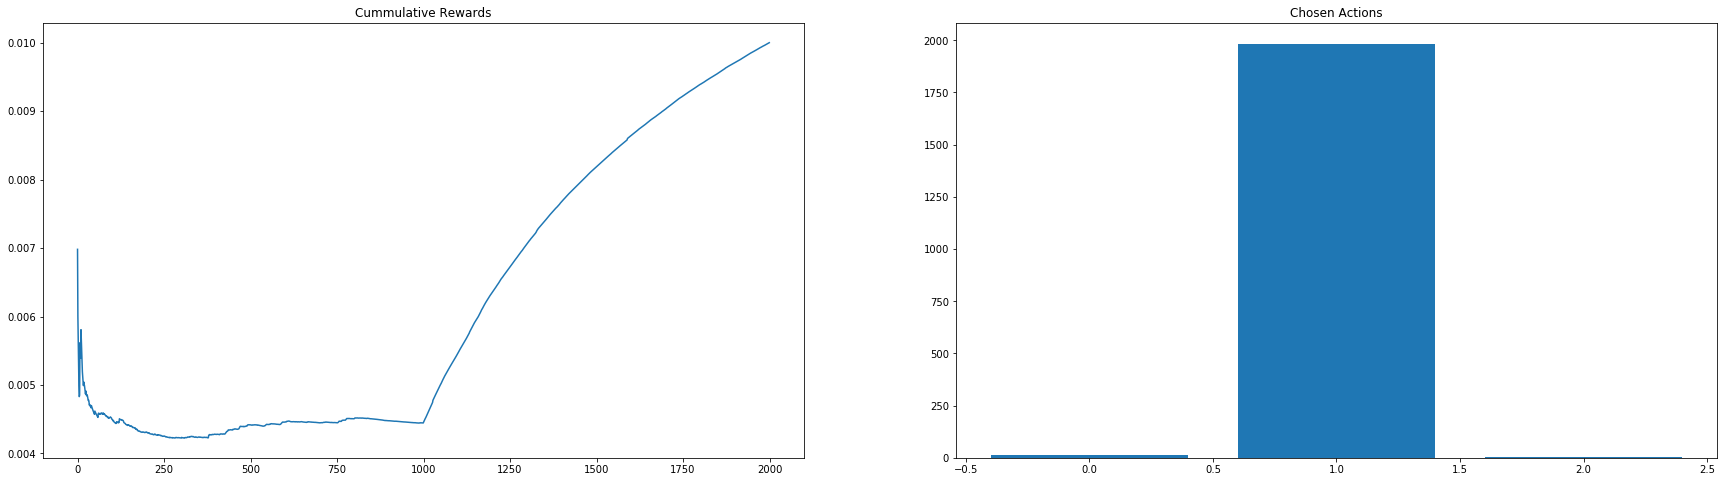

In [182]:
plot_history(rewards,cum_rewards, arm_counts)

### Quick sort should be the fastest at first an then at iteration 1000 merge sort should be faster

In [181]:
# initialize
total_reward = 0
num_choices = len(choices)
sample_count = [0 for i in range(num_choices)]
sample_rewards = [0 for i in range(num_choices)]
sample_mean = [0.0 for i in range(num_choices)]
sample_var = [0.0 for i in range(num_choices)]
arm_rewards = {0: [], 1:[], 2:[]}
rewards = []
cum_rewards = []
var_multiplier = 1000
alpha = 0.6


for n, elem in enumerate(list_distributions):
    dist_type = elem
    distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
    print("\n")
    print("Iteration:", n)
    theta = {}
    for i in range(len(choices)):
        if sample_count[i] >= 2:
            theta[i] = t.rvs(df=sample_count[i]-1,loc=sample_mean[i],scale=sample_var[i]/(sample_count[i]*(sample_count[i]-1)))
            print(choices_names[i],"Theta", theta[i])

        else:
            print("Less than two values for",choices_names[i])
            theta[i] = uniform.rvs(loc=0, scale=1)
            print(choices_names[i],"Theta", theta[i])
    
    choice = np.argmin([theta[i] for i in range(len(choices))])
    alg = choices[choice]
    alg_name = choices_names[choice]
    start_time = time.time()
    sorted_dist = alg(distribion[dist_type])
    reward = ((time.time() - start_time))*(1)
    print("\n")
    print("Chosen algorithm is: ", alg_name, "with reward:", reward)
    arm_rewards[choice].append(reward)
    sample_count[choice] += 1
    sample_rewards[choice] += reward
    #sample_mean[choice]  += alpha*(reward-sample_mean[choice])
    #sample_mean[choice]  += (1/sample_count[choice])*(reward-sample_mean[choice]) #this is alternative variation for non-stationary but does not work right now
    sample_mean[choice] = sample_rewards[choice]/sample_count[choice]
    sample_var[choice] = sum([(sample_mean[choice]-i)**2 for i in arm_rewards[choice]])*var_multiplier
    if sample_count[choice] >= 2:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice]/(sample_count[choice]-1))
    else:
        print("Sample mean is: ", sample_mean[choice], "Sample variance is:", sample_var[choice])
    total_reward += reward
    rewards.append(reward)
    cum_rewards.append(sum(rewards)/len(rewards))
    
    
q_values = {"quick_sort": sample_mean[0], "merge_sort": sample_mean[1], "heap_sort":sample_mean[2]} ## 
arm_counts = {"quick_sort": sample_count[0], "merge_sort": sample_count[1], "heap_sort":sample_count[2]} ## 

print("Total reward", np.round(total_reward,4))
print("Average rewards per algo", q_values)
print("Count per chosen algo", arm_counts)



Iteration: 0
Less than two values for quick_sort
quick_sort Theta 0.5566185532505074
Less than two values for merge_sort
merge_sort Theta 0.5209834303583104
Less than two values for heap_sort
heap_sort Theta 0.865613353853742


Chosen algorithm is:  merge_sort with reward: 0.006981372833251953
Sample mean is:  0.006981372833251953 Sample variance is: 0.0


Iteration: 1
Less than two values for quick_sort
quick_sort Theta 0.1410646671519168
Less than two values for merge_sort
merge_sort Theta 0.7184034010781136
Less than two values for heap_sort
heap_sort Theta 0.3155477135014969


Chosen algorithm is:  quick_sort with reward: 0.0050203800201416016
Sample mean is:  0.0050203800201416016 Sample variance is: 0.0


Iteration: 2
Less than two values for quick_sort
quick_sort Theta 0.9616125785363159
Less than two values for merge_sort
merge_sort Theta 0.3836215728511211
Less than two values for heap_sort
heap_sort Theta 0.689064336762226


Chosen algorithm is:  merge_sort with reward: 0.0


Iteration: 24
Less than two values for quick_sort
quick_sort Theta 0.7243768994649463
merge_sort Theta 0.004482426081197968
Less than two values for heap_sort
heap_sort Theta 0.781904438125071


Chosen algorithm is:  merge_sort with reward: 0.0059833526611328125
Sample mean is:  0.004644590875376825 Sample variance is: 0.0022171457082186675


Iteration: 25
Less than two values for quick_sort
quick_sort Theta 0.2477457576092551
merge_sort Theta 0.0045270820828411775
Less than two values for heap_sort
heap_sort Theta 0.5201767975158457


Chosen algorithm is:  merge_sort with reward: 0.003958225250244141
Sample mean is:  0.004615992307662964 Sample variance is: 0.002140377142537723


Iteration: 26
Less than two values for quick_sort
quick_sort Theta 0.6969055754898464
merge_sort Theta 0.0047369293402264225
Less than two values for heap_sort
heap_sort Theta 0.9400225977760963


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.004590883255004883 Sample



Iteration: 49
Less than two values for quick_sort
quick_sort Theta 0.791717483926907
merge_sort Theta 0.004487800474766687
Less than two values for heap_sort
heap_sort Theta 0.12680772742303426


Chosen algorithm is:  merge_sort with reward: 0.003957986831665039
Sample mean is:  0.004428252577781677 Sample variance is: 0.0012640917855350757


Iteration: 50
Less than two values for quick_sort
quick_sort Theta 0.10498891067726968
merge_sort Theta 0.00439701711662718
Less than two values for heap_sort
heap_sort Theta 0.8035356187824672


Chosen algorithm is:  merge_sort with reward: 0.006983757019042969
Sample mean is:  0.004480405729644152 Sample variance is: 0.0013710341512134254


Iteration: 51
Less than two values for quick_sort
quick_sort Theta 0.9864068295856833
merge_sort Theta 0.004474646755667471
Less than two values for heap_sort
heap_sort Theta 0.42780201690174624


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.00447056770324707 Sample 



Chosen algorithm is:  merge_sort with reward: 0.005956888198852539
Sample mean is:  0.004498618922821463 Sample variance is: 0.0011866728501259132


Iteration: 75
Less than two values for quick_sort
quick_sort Theta 0.08690370993647767
merge_sort Theta 0.00451014664817878
Less than two values for heap_sort
heap_sort Theta 0.17515917905265188


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.00449176414592846 Sample variance is: 0.0011738941671611456


Iteration: 76
Less than two values for quick_sort
quick_sort Theta 0.6158809961082499
merge_sort Theta 0.004487731598011147
Less than two values for heap_sort
heap_sort Theta 0.023356731692329102


Chosen algorithm is:  merge_sort with reward: 0.003995656967163086
Sample mean is:  0.004485149383544922 Sample variance is: 0.0011613123635740791


Iteration: 77
Less than two values for quick_sort
quick_sort Theta 0.6416196109338748
merge_sort Theta 0.0044744637145578935
Less than two values for heap_so



Iteration: 101
quick_sort Theta 0.004988110906355363
merge_sort Theta 0.0044151810496907504
Less than two values for heap_sort
heap_sort Theta 0.3837671838450839


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.004415752911808515 Sample variance is: 0.00097109179247859


Iteration: 102
quick_sort Theta 0.004997409030726071
merge_sort Theta 0.004416845065498454
Less than two values for heap_sort
heap_sort Theta 0.25088942994289254


Chosen algorithm is:  merge_sort with reward: 0.003014087677001953
Sample mean is:  0.0044017362594604495 Sample variance is: 0.0009809294387784092


Iteration: 103
quick_sort Theta 0.004987126287390914
merge_sort Theta 0.004397756533673926
Less than two values for heap_sort
heap_sort Theta 0.27868152531420354


Chosen algorithm is:  merge_sort with reward: 0.00498652458190918
Sample mean is:  0.004407526242851031 Sample variance is: 0.0009745060590646088


Iteration: 104
quick_sort Theta 0.004989398812567041
merge_so



Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.00437423324584961 Sample variance is: 0.000939288681329051


Iteration: 129
quick_sort Theta 0.004988239327740694
merge_sort Theta 0.004380574310376903
heap_sort Theta 0.010971064538850463


Chosen algorithm is:  merge_sort with reward: 0.003984689712524414
Sample mean is:  0.004371141630505759 Sample variance is: 0.0009329786906431445


Iteration: 130
quick_sort Theta 0.004987733346513752
merge_sort Theta 0.004368207427399616
heap_sort Theta 0.01097107072183309


Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004375992797491119 Sample variance is: 0.0009285628931424825


Iteration: 131
quick_sort Theta 0.004967335999784068
merge_sort Theta 0.004384134709977279
heap_sort Theta 0.010971045915219791


Chosen algorithm is:  merge_sort with reward: 0.003984212875366211
Sample mean is:  0.004372932016849518 Sample variance is: 0.0009224505267002493


Iteration: 132



Chosen algorithm is:  merge_sort with reward: 0.004988431930541992
Sample mean is:  0.004289901709254784 Sample variance is: 0.0008864411857436257


Iteration: 162
quick_sort Theta 0.004989211447849077
merge_sort Theta 0.0042848791215167725
heap_sort Theta 0.010971091398208442


Chosen algorithm is:  merge_sort with reward: 0.003993034362792969
Sample mean is:  0.004288034619025464 Sample variance is: 0.000881385076614067


Iteration: 163
quick_sort Theta 0.004988235975313151
merge_sort Theta 0.004287302570995215
heap_sort Theta 0.010971072832210958


Chosen algorithm is:  merge_sort with reward: 0.003987789154052734
Sample mean is:  0.004286158084869385 Sample variance is: 0.000876405195115654


Iteration: 164
quick_sort Theta 0.004988661790582904
merge_sort Theta 0.004287810991620951
heap_sort Theta 0.010971062973569524


Chosen algorithm is:  merge_sort with reward: 0.004022359848022461
Sample mean is:  0.0042845195865038755 Sample variance is: 0.0008713598956260794


Iteration: 1



Chosen algorithm is:  merge_sort with reward: 0.004988908767700195
Sample mean is:  0.004231216993974281 Sample variance is: 0.0008258169827906877


Iteration: 197
quick_sort Theta 0.0049886485349942755
merge_sort Theta 0.004229534454548122
heap_sort Theta 0.010971060866328253


Chosen algorithm is:  merge_sort with reward: 0.004953145980834961
Sample mean is:  0.004234938277411707 Sample variance is: 0.0008242246407020716


Iteration: 198
quick_sort Theta 0.0049882889506708454
merge_sort Theta 0.004230481688877049
heap_sort Theta 0.01097108438600556


Chosen algorithm is:  merge_sort with reward: 0.0040187835693359375
Sample mean is:  0.004233829791729267 Sample variance is: 0.0008202156644789899


Iteration: 199
quick_sort Theta 0.005028386842659924
merge_sort Theta 0.004239400504905587
heap_sort Theta 0.010971049500055643


Chosen algorithm is:  merge_sort with reward: 0.00498652458190918
Sample mean is:  0.004237670071271001 Sample variance is: 0.0008188999887060724


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.0042014738969635545 Sample variance is: 0.000778878454482054


Iteration: 232
quick_sort Theta 0.004990303350572728
merge_sort Theta 0.004198227627781173
heap_sort Theta 0.010971085113974188


Chosen algorithm is:  merge_sort with reward: 0.005956411361694336
Sample mean is:  0.004209137379342292 Sample variance is: 0.0007889112532465137


Iteration: 233
quick_sort Theta 0.004986446197180055
merge_sort Theta 0.004207122118435351
heap_sort Theta 0.010971089953044627


Chosen algorithm is:  merge_sort with reward: 0.003019094467163086
Sample mean is:  0.004203963279724121 Sample variance is: 0.0007916236265172726


Iteration: 234
quick_sort Theta 0.00499312774723914
merge_sort Theta 0.004206821872213142
heap_sort Theta 0.01097104748319799


Chosen algorithm is:  merge_sort with reward: 0.004984617233276367
Sample mean is:  0.004207342734068503 Sample variance is: 0.0007908199690576409


Iteration: 235

Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.004174474541467564 Sample variance is: 0.0007419688777283955


Iteration: 266
quick_sort Theta 0.004990823722733736
merge_sort Theta 0.004171291741168759
heap_sort Theta 0.010971079081544991


Chosen algorithm is:  merge_sort with reward: 0.004955291748046875
Sample mean is:  0.004177443428184597 Sample variance is: 0.0007414550932800332


Iteration: 267
quick_sort Theta 0.004989168157694204
merge_sort Theta 0.004174087208653492
heap_sort Theta 0.010971062234304588


Chosen algorithm is:  merge_sort with reward: 0.002992391586303711
Sample mean is:  0.004172954595450199 Sample variance is: 0.0007439553718928296


Iteration: 268
quick_sort Theta 0.004989839775296889
merge_sort Theta 0.004176749668249836
heap_sort Theta 0.010971065389112916


Chosen algorithm is:  merge_sort with reward: 0.004989147186279297
Sample mean is:  0.004176034567491063 Sample variance is: 0.0007436512094802227


Iteration: 26

merge_sort Theta 0.004173921697178194
heap_sort Theta 0.010971069622418252


Chosen algorithm is:  merge_sort with reward: 0.00498509407043457
Sample mean is:  0.004177570343017578 Sample variance is: 0.0006936177318512155


Iteration: 301
quick_sort Theta 0.00498825385160928
merge_sort Theta 0.004182784120348179
heap_sort Theta 0.010971059616459057


Chosen algorithm is:  merge_sort with reward: 0.005951642990112305
Sample mean is:  0.004183523606934004 Sample variance is: 0.0007018438412877252


Iteration: 302
quick_sort Theta 0.004989682261999989
merge_sort Theta 0.004184060858776033
heap_sort Theta 0.010971126066943613


Chosen algorithm is:  merge_sort with reward: 0.002993345260620117
Sample mean is:  0.004179543077347669 Sample variance is: 0.0007042262007327802


Iteration: 303
quick_sort Theta 0.004988896586488741
merge_sort Theta 0.004179813885989975
heap_sort Theta 0.010971066487843819


Chosen algorithm is:  merge_sort with reward: 0.003987312316894531
Sample mean is:  0.00

Chosen algorithm is:  merge_sort with reward: 0.0039904117584228516
Sample mean is:  0.004202669713555313 Sample variance is: 0.0007056558923178221


Iteration: 332
quick_sort Theta 0.004988696719266817
merge_sort Theta 0.004200439021245462
heap_sort Theta 0.010971092242430093


Chosen algorithm is:  merge_sort with reward: 0.0029897689819335938
Sample mean is:  0.004198983085191721 Sample variance is: 0.000707976016641637


Iteration: 333
quick_sort Theta 0.004985287448016621
merge_sort Theta 0.004199572114458811
heap_sort Theta 0.010971071220072558


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.0041983503283876365 Sample variance is: 0.0007059562396426208


Iteration: 334
quick_sort Theta 0.005011703961507146
merge_sort Theta 0.0041997318308203335
heap_sort Theta 0.01097106423472965


Chosen algorithm is:  merge_sort with reward: 0.004988431930541992
Sample mean is:  0.004200737281868465 Sample variance is: 0.0007057028663407717


Iteration: 33



Chosen algorithm is:  merge_sort with reward: 0.0049877166748046875
Sample mean is:  0.004191781675386297 Sample variance is: 0.0006931397776169395


Iteration: 365
quick_sort Theta 0.004992728686015572
merge_sort Theta 0.004191858543920668
heap_sort Theta 0.01097106370448546


Chosen algorithm is:  merge_sort with reward: 0.004022836685180664
Sample mean is:  0.004191314976518325 Sample variance is: 0.0006912985692669757


Iteration: 366
quick_sort Theta 0.004992340888720844
merge_sort Theta 0.004192275027214954
heap_sort Theta 0.010971060661545474


Chosen algorithm is:  merge_sort with reward: 0.004989147186279297
Sample mean is:  0.0041935128613937 Sample variance is: 0.0006911424480579102


Iteration: 367
quick_sort Theta 0.004988783102320599
merge_sort Theta 0.00419181186585868
heap_sort Theta 0.010971041951946293


Chosen algorithm is:  merge_sort with reward: 0.004986286163330078
Sample mean is:  0.004195690810025393 Sample variance is: 0.0006909650938999952


Iteration: 368


quick_sort Theta 0.004994918043100077
merge_sort Theta 0.004230299325825146
heap_sort Theta 0.010971052881135182


Chosen algorithm is:  merge_sort with reward: 0.005014896392822266
Sample mean is:  0.004239360999573222 Sample variance is: 0.0011855406856265927


Iteration: 395
quick_sort Theta 0.004988983737749558
merge_sort Theta 0.004238284486876362
heap_sort Theta 0.010971060524417781


Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004241268853751981 Sample variance is: 0.0011839354560282415


Iteration: 396
quick_sort Theta 0.004985123126156364
merge_sort Theta 0.004237141443812653
heap_sort Theta 0.010971063828893856


Chosen algorithm is:  merge_sort with reward: 0.004988193511962891
Sample mean is:  0.004243169425401372 Sample variance is: 0.001182334796347594


Iteration: 397
quick_sort Theta 0.004980538389497426
merge_sort Theta 0.004242192818361057
heap_sort Theta 0.01097107788042972


Chosen algorithm is:  merge_sort with reward: 0.00

merge_sort Theta 0.004245487694327157
heap_sort Theta 0.010971071312538756


Chosen algorithm is:  merge_sort with reward: 0.006986856460571289
Sample mean is:  0.0042554381883369305 Sample variance is: 0.001148005428173802


Iteration: 428
quick_sort Theta 0.004987955966203167
merge_sort Theta 0.0042556525086476305
heap_sort Theta 0.010971067004328552


Chosen algorithm is:  merge_sort with reward: 0.006004810333251953
Sample mean is:  0.004259554358089671 Sample variance is: 0.0011524985809108822


Iteration: 429
quick_sort Theta 0.004988115161169139
merge_sort Theta 0.004260278478690043
heap_sort Theta 0.010971059398647861


Chosen algorithm is:  merge_sort with reward: 0.008960962295532227
Sample mean is:  0.004270590526956907 Sample variance is: 0.0012016723514554131


Iteration: 430
quick_sort Theta 0.004987354113276439
merge_sort Theta 0.004270398965972247
heap_sort Theta 0.010971075674755732


Chosen algorithm is:  merge_sort with reward: 0.006968259811401367
Sample mean is:  0



Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.00432629259672459 Sample variance is: 0.0012969286701115224


Iteration: 458
quick_sort Theta 0.0049876401571809234
merge_sort Theta 0.004328418961073726
heap_sort Theta 0.010971050491922806


Chosen algorithm is:  merge_sort with reward: 0.0030281543731689453
Sample mean is:  0.004323439545683808 Sample variance is: 0.0012977756536417747


Iteration: 459
quick_sort Theta 0.0049895292724518045
merge_sort Theta 0.004324278126961455
heap_sort Theta 0.010971076824758178


Chosen algorithm is:  merge_sort with reward: 0.003988981246948242
Sample mean is:  0.00432270608450237 Sample variance is: 0.001295168711636879


Iteration: 460
quick_sort Theta 0.004984894128865138
merge_sort Theta 0.004321076334472783
heap_sort Theta 0.010971067292114457


Chosen algorithm is:  merge_sort with reward: 0.0039882659912109375
Sample mean is:  0.0043219742681056715 Sample variance is: 0.0012925731781185017


Iteration


Iteration: 488
quick_sort Theta 0.004987713351682491
merge_sort Theta 0.0043656956616266425
heap_sort Theta 0.010971068846101818


Chosen algorithm is:  merge_sort with reward: 0.005985260009765625
Sample mean is:  0.004371045299412049 Sample variance is: 0.0014253398703706452


Iteration: 489
quick_sort Theta 0.004988169881235248
merge_sort Theta 0.004373291037637169
heap_sort Theta 0.010971076834899325


Chosen algorithm is:  merge_sort with reward: 0.0039937496185302734
Sample mean is:  0.004370268970850564 Sample variance is: 0.0014226939306902903


Iteration: 490
quick_sort Theta 0.004989547375343753
merge_sort Theta 0.00436948526611057
heap_sort Theta 0.010971076012628036


Chosen algorithm is:  merge_sort with reward: 0.005023002624511719
Sample mean is:  0.004371609286361162 Sample variance is: 0.0014206414459637313


Iteration: 491
quick_sort Theta 0.004988829573907515
merge_sort Theta 0.004368440796666575
heap_sort Theta 0.010971068644519081


Chosen algorithm is:  merge_sor



Chosen algorithm is:  merge_sort with reward: 0.0059850215911865234
Sample mean is:  0.004388016473854995 Sample variance is: 0.0014402050938054653


Iteration: 521
quick_sort Theta 0.004973929352856985
merge_sort Theta 0.004385351513478667
heap_sort Theta 0.010971068905417564


Chosen algorithm is:  merge_sort with reward: 0.0029964447021484375
Sample mean is:  0.0043853300418632835 Sample variance is: 0.0014411577602253451


Iteration: 522
quick_sort Theta 0.004992831018390299
merge_sort Theta 0.004385576924635557
heap_sort Theta 0.010970979793407694


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.0043845654452696935 Sample variance is: 0.0014386790139136055


Iteration: 523
quick_sort Theta 0.004987854979966042
merge_sort Theta 0.004384513511867252
heap_sort Theta 0.010971066577619676


Chosen algorithm is:  merge_sort with reward: 0.004987955093383789
Sample mean is:  0.004385725809977605 Sample variance is: 0.001436607144744983


Iteration

Chosen algorithm is:  merge_sort with reward: 0.003983974456787109
Sample mean is:  0.0043960672409922375 Sample variance is: 0.0014440798748993951


Iteration: 551
quick_sort Theta 0.004987471564981301
merge_sort Theta 0.004395710323307428
heap_sort Theta 0.010971127157801307


Chosen algorithm is:  merge_sort with reward: 0.0039920806884765625
Sample mean is:  0.00439533003925407 Sample variance is: 0.0014417376947168077


Iteration: 552
quick_sort Theta 0.004989430565831491
merge_sort Theta 0.004396900901491155
heap_sort Theta 0.010971068812658313


Chosen algorithm is:  merge_sort with reward: 0.004984855651855469
Sample mean is:  0.004396403856399064 Sample variance is: 0.0014397398292249944


Iteration: 553
quick_sort Theta 0.004990520863040802
merge_sort Theta 0.004389330226618048
heap_sort Theta 0.010971077012416841


Chosen algorithm is:  merge_sort with reward: 0.005021095275878906
Sample mean is:  0.004397539658979936 Sample variance is: 0.0014378268784312244


Iteration: 55



Chosen algorithm is:  merge_sort with reward: 0.0049550533294677734
Sample mean is:  0.004400320119098808 Sample variance is: 0.0014110289752768503


Iteration: 582
quick_sort Theta 0.004982516129848682
merge_sort Theta 0.00439714010203884
heap_sort Theta 0.010971070066856591


Chosen algorithm is:  merge_sort with reward: 0.0029909610748291016
Sample mean is:  0.004397885992942902 Sample variance is: 0.0014120183063887441


Iteration: 583
quick_sort Theta 0.004988040053001712
merge_sort Theta 0.004399833761371128
heap_sort Theta 0.010971065754419366


Chosen algorithm is:  merge_sort with reward: 0.004023313522338867
Sample mean is:  0.004397240178338413 Sample variance is: 0.0014098214917513912


Iteration: 584
quick_sort Theta 0.004990796829695039
merge_sort Theta 0.004400460864038508
heap_sort Theta 0.010971069820082793


Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004398255668285587 Sample variance is: 0.0014079899037643393


Iteration: 



Chosen algorithm is:  merge_sort with reward: 0.0049839019775390625
Sample mean is:  0.004449101655106796 Sample variance is: 0.0015001746634848475


Iteration: 612
quick_sort Theta 0.004990057748035369
merge_sort Theta 0.004447776246347314
heap_sort Theta 0.010971069521714715


Chosen algorithm is:  merge_sort with reward: 0.004008293151855469
Sample mean is:  0.00444837783162034 Sample variance is: 0.0014980263384939065


Iteration: 613
quick_sort Theta 0.004988330781927757
merge_sort Theta 0.004446875551606377
heap_sort Theta 0.010971060403013521


Chosen algorithm is:  merge_sort with reward: 0.0029938220977783203
Sample mean is:  0.004445993314023878 Sample variance is: 0.0014990349388725856


Iteration: 614
quick_sort Theta 0.004988170192853738
merge_sort Theta 0.004444063728595554
heap_sort Theta 0.010971091877846574


Chosen algorithm is:  merge_sort with reward: 0.002992391586303711
Sample mean is:  0.004443614260459688 Sample variance is: 0.0015000357009178117


Iteration: 



Iteration: 645
quick_sort Theta 0.004992574005571749
merge_sort Theta 0.0044375408951718995
heap_sort Theta 0.010971055870722625


Chosen algorithm is:  merge_sort with reward: 0.005982637405395508
Sample mean is:  0.004441879620061856 Sample variance is: 0.0014672926365343565


Iteration: 646
quick_sort Theta 0.004988680438121712
merge_sort Theta 0.004441505274594896
heap_sort Theta 0.01097106964277374


Chosen algorithm is:  merge_sort with reward: 0.004987001419067383
Sample mean is:  0.0044427273989094546 Sample variance is: 0.0014654692767157986


Iteration: 647
quick_sort Theta 0.00481503672521986
merge_sort Theta 0.004444620911920333
heap_sort Theta 0.010971059205012712


Chosen algorithm is:  merge_sort with reward: 0.003987789154052734
Sample mean is:  0.004442020973063404 Sample variance is: 0.0014635115444448545


Iteration: 648
quick_sort Theta 0.004990910456632537
merge_sort Theta 0.004440075005399334
heap_sort Theta 0.010970934585654993


Chosen algorithm is:  merge_sor

Iteration: 676
quick_sort Theta 0.00498812678788013
merge_sort Theta 0.004435051005908066
heap_sort Theta 0.010971065710829375


Chosen algorithm is:  merge_sort with reward: 0.0049860477447509766
Sample mean is:  0.004437451908173923 Sample variance is: 0.0014453679652219726


Iteration: 677
quick_sort Theta 0.004990150351788935
merge_sort Theta 0.004439779294136421
heap_sort Theta 0.010971065468290332


Chosen algorithm is:  merge_sort with reward: 0.002991199493408203
Sample mean is:  0.004435306133077831 Sample variance is: 0.0014463236483565625


Iteration: 678
quick_sort Theta 0.00498879700767788
merge_sort Theta 0.004436645328037502
heap_sort Theta 0.010971064643814159


Chosen algorithm is:  merge_sort with reward: 0.004987239837646484
Sample mean is:  0.004436123812640155 Sample variance is: 0.001444629072482642


Iteration: 679
quick_sort Theta 0.004988113380176778
merge_sort Theta 0.004431934732840619
heap_sort Theta 0.010971082462000556


Chosen algorithm is:  merge_sort wi

heap_sort Theta 0.01097107071858365


Chosen algorithm is:  merge_sort with reward: 0.005985260009765625
Sample mean is:  0.004430700631722512 Sample variance is: 0.0014023853426296535


Iteration: 710
quick_sort Theta 0.004988397811327174
merge_sort Theta 0.004433176852181697
heap_sort Theta 0.0109710812135802


Chosen algorithm is:  merge_sort with reward: 0.0049855709075927734
Sample mean is:  0.004431485455309316 Sample variance is: 0.001400834436404628


Iteration: 711
quick_sort Theta 0.004989495438220189
merge_sort Theta 0.004431890025433829
heap_sort Theta 0.010971070694227288


Chosen algorithm is:  merge_sort with reward: 0.005982875823974609
Sample mean is:  0.004433676684643589 Sample variance is: 0.0014022525102200434


Iteration: 712
quick_sort Theta 0.004989860656658776
merge_sort Theta 0.004436229335794297
heap_sort Theta 0.010971286459601572


Chosen algorithm is:  merge_sort with reward: 0.004988431930541992
Sample mean is:  0.0044344591320990175 Sample variance is: 0



Chosen algorithm is:  merge_sort with reward: 0.004986763000488281
Sample mean is:  0.004430744023627148 Sample variance is: 0.0013728751366773068


Iteration: 741
quick_sort Theta 0.004992045016676667
merge_sort Theta 0.004429003956083127
heap_sort Theta 0.01097106808540932


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004431498406056143 Sample variance is: 0.0013714323386834774


Iteration: 742
quick_sort Theta 0.004986686285218382
merge_sort Theta 0.004431928694968718
heap_sort Theta 0.010971067331686232


Chosen algorithm is:  merge_sort with reward: 0.004977226257324219
Sample mean is:  0.004432236874055153 Sample variance is: 0.0013699770318357952


Iteration: 743
quick_sort Theta 0.004987208735317934
merge_sort Theta 0.004431544969585885
heap_sort Theta 0.010971074862978493


Chosen algorithm is:  merge_sort with reward: 0.003988742828369141
Sample mean is:  0.004431637557777199 Sample variance is: 0.0013683889995536852


Iteration: 74



Iteration: 770
quick_sort Theta 0.00498995439175945
merge_sort Theta 0.004466009794187105
heap_sort Theta 0.010971080882345713


Chosen algorithm is:  merge_sort with reward: 0.005019426345825195
Sample mean is:  0.004468424534704415 Sample variance is: 0.0015213894271084523


Iteration: 771
quick_sort Theta 0.00498780619930035
merge_sort Theta 0.004467919425654954
heap_sort Theta 0.010971065719737102


Chosen algorithm is:  merge_sort with reward: 0.003991603851318359
Sample mean is:  0.0044678036744395895 Sample variance is: 0.0015197019075491034


Iteration: 772
quick_sort Theta 0.0049886117153464925
merge_sort Theta 0.004467459476582343
heap_sort Theta 0.010971078491025486


Chosen algorithm is:  merge_sort with reward: 0.004022836685180664
Sample mean is:  0.00446722504376435 Sample variance is: 0.0015179806005731005


Iteration: 773
quick_sort Theta 0.004989319237441174
merge_sort Theta 0.004464307579215436
heap_sort Theta 0.01097106612498101


Chosen algorithm is:  merge_sort 



Chosen algorithm is:  merge_sort with reward: 0.004988193511962891
Sample mean is:  0.00448988580224502 Sample variance is: 0.0015932531172030593


Iteration: 800
quick_sort Theta 0.004986606557502878
merge_sort Theta 0.004488706387300056
heap_sort Theta 0.01097106618221631


Chosen algorithm is:  merge_sort with reward: 0.00498509407043457
Sample mean is:  0.0044905071426066135 Sample variance is: 0.0015915592358196362


Iteration: 801
quick_sort Theta 0.004989842522743003
merge_sort Theta 0.004492961271337846
heap_sort Theta 0.010971081692031747


Chosen algorithm is:  merge_sort with reward: 0.009974956512451172
Sample mean is:  0.004497379886177847 Sample variance is: 0.0016272555124073637


Iteration: 802
quick_sort Theta 0.004969901923236115
merge_sort Theta 0.00449448392893262
heap_sort Theta 0.010971144719697793


Chosen algorithm is:  merge_sort with reward: 0.0069828033447265625
Sample mean is:  0.004500490553835605 Sample variance is: 0.0016329476714669257


Iteration: 803

merge_sort Theta 0.004494917980881083
heap_sort Theta 0.010971066899685284


Chosen algorithm is:  merge_sort with reward: 0.004983425140380859
Sample mean is:  0.004495878750064209 Sample variance is: 0.0015963235632554498


Iteration: 831
quick_sort Theta 0.004989081292129076
merge_sort Theta 0.004494816409175157
heap_sort Theta 0.01097106344095314


Chosen algorithm is:  merge_sort with reward: 0.004952669143676758
Sample mean is:  0.004496430429283547 Sample variance is: 0.0015946453067846801


Iteration: 832
quick_sort Theta 0.004989370348218177
merge_sort Theta 0.004498971385518407
heap_sort Theta 0.01097108255046324


Chosen algorithm is:  merge_sort with reward: 0.003991365432739258
Sample mean is:  0.004495821183208102 Sample variance is: 0.0015930271155227022


Iteration: 833
quick_sort Theta 0.004988920065256504
merge_sort Theta 0.004498879751719703
heap_sort Theta 0.01097106759691166


Chosen algorithm is:  merge_sort with reward: 0.0039899349212646484
Sample mean is:  0.00

Iteration: 865
quick_sort Theta 0.004988445336961734
merge_sort Theta 0.004478548421728156
heap_sort Theta 0.010971063376337176


Chosen algorithm is:  merge_sort with reward: 0.0050165653228759766
Sample mean is:  0.004481188935636091 Sample variance is: 0.0015598566849487428


Iteration: 866
quick_sort Theta 0.0049882953931981
merge_sort Theta 0.0044775291999553934
heap_sort Theta 0.010971064702363956


Chosen algorithm is:  merge_sort with reward: 0.0039942264556884766
Sample mean is:  0.004480624668567785 Sample variance is: 0.0015583218833188528


Iteration: 867
quick_sort Theta 0.004986140616899891
merge_sort Theta 0.004480707866880161
heap_sort Theta 0.01097106843921374


Chosen algorithm is:  merge_sort with reward: 0.003991127014160156
Sample mean is:  0.004480058120356666 Sample variance is: 0.0015567935041141403


Iteration: 868
quick_sort Theta 0.004988520822790701
merge_sort Theta 0.0044822501649876756
heap_sort Theta 0.010971071759546973


Chosen algorithm is:  merge_sort

merge_sort Theta 0.004459380483891353
heap_sort Theta 0.01097108485315046


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.004462005572612059 Sample variance is: 0.0015262586727152513


Iteration: 899
quick_sort Theta 0.004991897026313862
merge_sort Theta 0.0044637356086135865
heap_sort Theta 0.010971142231903203


Chosen algorithm is:  merge_sort with reward: 0.00395965576171875
Sample mean is:  0.004461444914340973 Sample variance is: 0.0015248350023389524


Iteration: 900
quick_sort Theta 0.004965129302129937
merge_sort Theta 0.004459243090467998
heap_sort Theta 0.010971057043124845


Chosen algorithm is:  merge_sort with reward: 0.004984855651855469
Sample mean is:  0.0044620284268688595 Sample variance is: 0.0015234385942821287


Iteration: 901
quick_sort Theta 0.004987161321868935
merge_sort Theta 0.0044631302772917885
heap_sort Theta 0.010971072196744163


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.



Chosen algorithm is:  merge_sort with reward: 0.003990650177001953
Sample mean is:  0.004448390263383106 Sample variance is: 0.0014856049230459298


Iteration: 934
quick_sort Theta 0.004986460487992216
merge_sort Theta 0.0044511378904795815
heap_sort Theta 0.010971074113254986


Chosen algorithm is:  merge_sort with reward: 0.00399017333984375
Sample mean is:  0.004447898086236447 Sample variance is: 0.001484233022295473


Iteration: 935
quick_sort Theta 0.004988499062241007
merge_sort Theta 0.004447807148037919
heap_sort Theta 0.010971079556331965


Chosen algorithm is:  merge_sort with reward: 0.003988027572631836
Sample mean is:  0.004447404662938589 Sample variance is: 0.0014828656978660027


Iteration: 936
quick_sort Theta 0.004992461854619571
merge_sort Theta 0.004446686664214797
heap_sort Theta 0.010971067109747077


Chosen algorithm is:  merge_sort with reward: 0.003989219665527344
Sample mean is:  0.004446913575052832 Sample variance is: 0.0014814996493519336


Iteration: 93

quick_sort Theta 0.00498669884732722
merge_sort Theta 0.004438048665946179
heap_sort Theta 0.010971062506310511


Chosen algorithm is:  merge_sort with reward: 0.004987478256225586
Sample mean is:  0.0044363823669085365 Sample variance is: 0.0014406849102034291


Iteration: 968
quick_sort Theta 0.004988128927952301
merge_sort Theta 0.00443661640281624
heap_sort Theta 0.01097105570726894


Chosen algorithm is:  merge_sort with reward: 0.0029926300048828125
Sample mean is:  0.004434886250471204 Sample variance is: 0.0014413504454223187


Iteration: 969
quick_sort Theta 0.004987255270924272
merge_sort Theta 0.004431876748365837
heap_sort Theta 0.010971065019472608


Chosen algorithm is:  merge_sort with reward: 0.003988504409790039
Sample mean is:  0.004434424157468428 Sample variance is: 0.0014400630879428803


Iteration: 970
quick_sort Theta 0.005004553683928235
merge_sort Theta 0.004436602954889502
heap_sort Theta 0.010971049850231325


Chosen algorithm is:  merge_sort with reward: 0.0



Chosen algorithm is:  merge_sort with reward: 0.015999317169189453
Sample mean is:  0.004442308467991254 Sample variance is: 0.0015459697112177118


Iteration: 1001
quick_sort Theta 0.004987489142562856
merge_sort Theta 0.004442921763787067
heap_sort Theta 0.010973292581086818


Chosen algorithm is:  merge_sort with reward: 0.014998674392700195
Sample mean is:  0.004452885988957897 Sample variance is: 0.0016560792715419237


Iteration: 1002
quick_sort Theta 0.004988356730362672
merge_sort Theta 0.00445119823955248
heap_sort Theta 0.010971035493610084


Chosen algorithm is:  merge_sort with reward: 0.0159914493560791
Sample mean is:  0.004464436102438498 Sample variance is: 0.0017876915897676129


Iteration: 1003
quick_sort Theta 0.0049591507878804725
merge_sort Theta 0.004464824167096598
heap_sort Theta 0.010970758744790289


Chosen algorithm is:  merge_sort with reward: 0.01499485969543457
Sample mean is:  0.004474966526031494 Sample variance is: 0.0018967919297447017


Iteration: 1



Iteration: 1033
quick_sort Theta 0.004987388389419477
merge_sort Theta 0.004817989499201779
heap_sort Theta 0.010971072715633037


Chosen algorithm is:  merge_sort with reward: 0.016953706741333008
Sample mean is:  0.004827317682284753 Sample variance is: 0.006378954315505018


Iteration: 1034
quick_sort Theta 0.004991339157170239
merge_sort Theta 0.004827322619364951
heap_sort Theta 0.010971105876563154


Chosen algorithm is:  merge_sort with reward: 0.015926361083984375
Sample mean is:  0.004838083000812105 Sample variance is: 0.006492245893543602


Iteration: 1035
quick_sort Theta 0.005053318095660617
merge_sort Theta 0.004834730965978657
heap_sort Theta 0.010971061093225735


Chosen algorithm is:  merge_sort with reward: 0.015959978103637695
Sample mean is:  0.004848860030950502 Sample variance is: 0.006605809854538742


Iteration: 1036
quick_sort Theta 0.004989447981744289
merge_sort Theta 0.004851789157588997
heap_sort Theta 0.010971069435186163


Chosen algorithm is:  merge_so

Chosen algorithm is:  merge_sort with reward: 0.014961481094360352
Sample mean is:  0.005129265267405451 Sample variance is: 0.009462983701829932


Iteration: 1066
quick_sort Theta 0.015401250868460918
merge_sort Theta 0.005118395724539669
heap_sort Theta 0.010971294320472934


Chosen algorithm is:  merge_sort with reward: 0.014961481094360352
Sample mean is:  0.0051385409427139 Sample variance is: 0.009545248370313801


Iteration: 1067
quick_sort Theta 0.01388099042625634
merge_sort Theta 0.005135458399518891
heap_sort Theta 0.010971063342977675


Chosen algorithm is:  merge_sort with reward: 0.014964103698730469
Sample mean is:  0.005147801605066412 Sample variance is: 0.009627234638127953


Iteration: 1068
quick_sort Theta 0.011139435823366853
merge_sort Theta 0.005131906769426497
heap_sort Theta 0.01097107303474387


Chosen algorithm is:  merge_sort with reward: 0.01498556137084961
Sample mean is:  0.005157065032341162 Sample variance is: 0.009709292273565272


Iteration: 1069
quic



Iteration: 1102
quick_sort Theta 0.00766552324176052
merge_sort Theta 0.005421642037424055
heap_sort Theta 0.01097105875545294


Chosen algorithm is:  merge_sort with reward: 0.01695871353149414
Sample mean is:  0.005449743575701431 Sample variance is: 0.012189017513998418


Iteration: 1103
quick_sort Theta 0.012446188742995128
merge_sort Theta 0.005464683197275519
heap_sort Theta 0.010971063545786735


Chosen algorithm is:  merge_sort with reward: 0.01692056655883789
Sample mean is:  0.0054602096550656065 Sample variance is: 0.0122979405348685


Iteration: 1104
quick_sort Theta 0.009156194923576066
merge_sort Theta 0.005459855002829434
heap_sort Theta 0.010971077476450564


Chosen algorithm is:  merge_sort with reward: 0.01595926284790039
Sample mean is:  0.005469780350774662 Sample variance is: 0.012387203029547109


Iteration: 1105
quick_sort Theta 0.009803569736967669
merge_sort Theta 0.005465898625307758
heap_sort Theta 0.010971075132501285


Chosen algorithm is:  merge_sort wit


Chosen algorithm is:  merge_sort with reward: 0.02294158935546875
Sample mean is:  0.005722771335751137 Sample variance is: 0.014749552106342245


Iteration: 1134
quick_sort Theta 0.0068975703832477335
merge_sort Theta 0.005709663622397068
heap_sort Theta 0.010971090488014704


Chosen algorithm is:  merge_sort with reward: 0.016953706741333008
Sample mean is:  0.005732754389444987 Sample variance is: 0.01484854876020953


Iteration: 1135
quick_sort Theta 0.01232978518170883
merge_sort Theta 0.005753350241764666
heap_sort Theta 0.010971075070511883


Chosen algorithm is:  merge_sort with reward: 0.019946575164794922
Sample mean is:  0.005745377676101603 Sample variance is: 0.015014775184333461


Iteration: 1136
quick_sort Theta 0.01022044649469412
merge_sort Theta 0.005737162389545053
heap_sort Theta 0.010971070803829117


Chosen algorithm is:  merge_sort with reward: 0.017951488494873047
Sample mean is:  0.0057562082979461205 Sample variance is: 0.015133640340963423


Iteration: 1137




Iteration: 1165
quick_sort Theta 0.010333603184626138
merge_sort Theta 0.005999493560590833
heap_sort Theta 0.010971072796928837


Chosen algorithm is:  merge_sort with reward: 0.017983198165893555
Sample mean is:  0.00601132752059342 Sample variance is: 0.01743505062608571


Iteration: 1166
quick_sort Theta 0.010940045075110809
merge_sort Theta 0.006043604504119715
heap_sort Theta 0.010963732155799223


Chosen algorithm is:  merge_sort with reward: 0.019915342330932617
Sample mean is:  0.006023355215066032 Sample variance is: 0.017587188586239796


Iteration: 1167
quick_sort Theta 0.01187454277688171
merge_sort Theta 0.006018014971768068
heap_sort Theta 0.010971042477878508


Chosen algorithm is:  merge_sort with reward: 0.015927791595458984
Sample mean is:  0.006031915661375792 Sample variance is: 0.01765676115114562


Iteration: 1168
quick_sort Theta 0.010926317942910366
merge_sort Theta 0.006040976587853308
heap_sort Theta 0.010971065078696158


Chosen algorithm is:  merge_sort w


Chosen algorithm is:  merge_sort with reward: 0.014961719512939453
Sample mean is:  0.006266767511496673 Sample variance is: 0.019667899064904914


Iteration: 1196
quick_sort Theta 0.01585478771725336
merge_sort Theta 0.006279255958395069
heap_sort Theta 0.01097106806971754


Chosen algorithm is:  merge_sort with reward: 0.014963388442993164
Sample mean is:  0.006274106432113969 Sample variance is: 0.01971511147432267


Iteration: 1197
quick_sort Theta 0.016427609887459397
merge_sort Theta 0.006281380583497079
heap_sort Theta 0.0109713768626276


Chosen algorithm is:  merge_sort with reward: 0.014987707138061523
Sample mean is:  0.006281453481613082 Sample variance is: 0.019762493505151895


Iteration: 1198
quick_sort Theta 0.01172488632099554
merge_sort Theta 0.006273162850836942
heap_sort Theta 0.010971053854466907


Chosen algorithm is:  merge_sort with reward: 0.014989376068115234
Sample mean is:  0.006288789557928585 Sample variance is: 0.019809712341815226


Iteration: 1199
quic



Chosen algorithm is:  merge_sort with reward: 0.01695728302001953
Sample mean is:  0.006532298041915581 Sample variance is: 0.021514841728542285


Iteration: 1231
quick_sort Theta 0.009869378394570236
merge_sort Theta 0.006552699443312509
heap_sort Theta 0.010970871798685656


Chosen algorithm is:  merge_sort with reward: 0.01493215560913086
Sample mean is:  0.006539183171069036 Sample variance is: 0.021555026249720898


Iteration: 1232
quick_sort Theta 0.012814081183186141
merge_sort Theta 0.006539031624463142
heap_sort Theta 0.010971060794501485


Chosen algorithm is:  merge_sort with reward: 0.014963626861572266
Sample mean is:  0.006546082797351184 Sample variance is: 0.021595483708517323


Iteration: 1233
quick_sort Theta 0.015205121778237936
merge_sort Theta 0.006535419074148456
heap_sort Theta 0.010971418223924643


Chosen algorithm is:  merge_sort with reward: 0.015286922454833984
Sample mean is:  0.006553235693961236 Sample variance is: 0.02164031931202833


Iteration: 1234




Iteration: 1266
quick_sort Theta 0.012971007296126472
merge_sort Theta 0.006752357965978009
heap_sort Theta 0.010971021623578055


Chosen algorithm is:  merge_sort with reward: 0.014961481094360352
Sample mean is:  0.006779061550158633 Sample variance is: 0.023050964568126154


Iteration: 1267
quick_sort Theta 0.014566718211150553
merge_sort Theta 0.006784558226972138
heap_sort Theta 0.010971071863041684


Chosen algorithm is:  merge_sort with reward: 0.015954017639160156
Sample mean is:  0.006786372272141901 Sample variance is: 0.023099658171885196


Iteration: 1268
quick_sort Theta 0.007564547259611026
merge_sort Theta 0.006799405320211293
heap_sort Theta 0.010971061292174459


Chosen algorithm is:  merge_sort with reward: 0.0159909725189209
Sample mean is:  0.006793700775523094 Sample variance is: 0.023148708013787263


Iteration: 1269
quick_sort Theta 0.012874555997819042
merge_sort Theta 0.006769159856890122
heap_sort Theta 0.010971110106299408


Chosen algorithm is:  merge_sort



Iteration: 1299
quick_sort Theta 0.01235626268576375
merge_sort Theta 0.006989040952243382
heap_sort Theta 0.010971035405164446


Chosen algorithm is:  merge_sort with reward: 0.015989065170288086
Sample mean is:  0.007008855252091794 Sample variance is: 0.024496551321801802


Iteration: 1300
quick_sort Theta 0.011643965291299749
merge_sort Theta 0.00703881228029077
heap_sort Theta 0.010971064838724778


Chosen algorithm is:  merge_sort with reward: 0.016923904418945312
Sample mean is:  0.0070165532716312765 Sample variance is: 0.02455384372461227


Iteration: 1301
quick_sort Theta 0.012374132630535176
merge_sort Theta 0.007029934362195264
heap_sort Theta 0.010971079988391601


Chosen algorithm is:  merge_sort with reward: 0.015957117080688477
Sample mean is:  0.007023489318030855 Sample variance is: 0.02459679234676587


Iteration: 1302
quick_sort Theta 0.014349706039614258
merge_sort Theta 0.007037159484996899
heap_sort Theta 0.010971050911247154


Chosen algorithm is:  merge_sort 



Chosen algorithm is:  merge_sort with reward: 0.019945144653320312
Sample mean is:  0.007231602621765368 Sample variance is: 0.025977831994236245


Iteration: 1332
quick_sort Theta 0.01346702017265702
merge_sort Theta 0.007261472812220852
heap_sort Theta 0.010971062566667434


Chosen algorithm is:  merge_sort with reward: 0.01499485969543457
Sample mean is:  0.007237483877124209 Sample variance is: 0.02600379459522215


Iteration: 1333
quick_sort Theta 0.013723143809534273
merge_sort Theta 0.00722575581877289
heap_sort Theta 0.010971029817036675


Chosen algorithm is:  merge_sort with reward: 0.01495981216430664
Sample mean is:  0.007243329697175066 Sample variance is: 0.026029238092372328


Iteration: 1334
quick_sort Theta 0.014495293698125718
merge_sort Theta 0.007237508892450311
heap_sort Theta 0.010971062785102686


Chosen algorithm is:  merge_sort with reward: 0.01495671272277832
Sample mean is:  0.007249164328813192 Sample variance is: 0.026054538648662


Iteration: 1335
quick_



Chosen algorithm is:  merge_sort with reward: 0.015956640243530273
Sample mean is:  0.007438573851377455 Sample variance is: 0.02699837975462769


Iteration: 1366
quick_sort Theta 0.01684766969258957
merge_sort Theta 0.007424034882481332
heap_sort Theta 0.0109710662016764


Chosen algorithm is:  merge_sort with reward: 0.014995574951171875
Sample mean is:  0.0074441550929578056 Sample variance is: 0.027020602746807235


Iteration: 1367
quick_sort Theta 0.012920236202921546
merge_sort Theta 0.007415968084829456
heap_sort Theta 0.010970883666719588


Chosen algorithm is:  merge_sort with reward: 0.014992713928222656
Sample mean is:  0.0074497259850871515 Sample variance is: 0.027042698821796638


Iteration: 1368
quick_sort Theta 0.015605449319760486
merge_sort Theta 0.007460535206395784
heap_sort Theta 0.010971301885759798


Chosen algorithm is:  merge_sort with reward: 0.014988183975219727
Sample mean is:  0.007455285319888135 Sample variance is: 0.027064649922339264


Iteration: 1369



Iteration: 1400
quick_sort Theta 0.010465982648207995
merge_sort Theta 0.007631258768314727
heap_sort Theta 0.01097105270302682


Chosen algorithm is:  merge_sort with reward: 0.015957117080688477
Sample mean is:  0.007640525483947666 Sample variance is: 0.027918560014367124


Iteration: 1401
quick_sort Theta 0.014212140843857171
merge_sort Theta 0.007647294606745157
heap_sort Theta 0.01097106048263213


Chosen algorithm is:  merge_sort with reward: 0.014960289001464844
Sample mean is:  0.007645795292095627 Sample variance is: 0.027937019527471258


Iteration: 1402
quick_sort Theta 0.014333566314501812
merge_sort Theta 0.007615494585667339
heap_sort Theta 0.010971067936702366


Chosen algorithm is:  merge_sort with reward: 0.01596808433532715
Sample mean is:  0.007651782550400109 Sample variance is: 0.027966734176641507


Iteration: 1403
quick_sort Theta 0.011045581509542993
merge_sort Theta 0.007646667459081374
heap_sort Theta 0.0109710716055801


Chosen algorithm is:  merge_sort wi



Iteration: 1434
quick_sort Theta 0.012250386419712836
merge_sort Theta 0.007807247136688457
heap_sort Theta 0.010971083532589665


Chosen algorithm is:  merge_sort with reward: 0.014959335327148438
Sample mean is:  0.00782519436419094 Sample variance is: 0.028653820194053495


Iteration: 1435
quick_sort Theta 0.013159270843008613
merge_sort Theta 0.007814608068556281
heap_sort Theta 0.010971063830653192


Chosen algorithm is:  merge_sort with reward: 0.014992952346801758
Sample mean is:  0.007830231439371973 Sample variance is: 0.028669774364072708


Iteration: 1436
quick_sort Theta 0.011524029436412106
merge_sort Theta 0.0078062220986698135
heap_sort Theta 0.010970825391088998


Chosen algorithm is:  merge_sort with reward: 0.01498866081237793
Sample mean is:  0.007835258426291219 Sample variance is: 0.02868561227791214


Iteration: 1437
quick_sort Theta 0.014580340900181371
merge_sort Theta 0.007851530785415648
heap_sort Theta 0.01097106475823208


Chosen algorithm is:  merge_sort 



Chosen algorithm is:  merge_sort with reward: 0.01592874526977539
Sample mean is:  0.007997479903828967 Sample variance is: 0.029234746915983018


Iteration: 1469
quick_sort Theta 0.014647847050407033
merge_sort Theta 0.008010711210225882
heap_sort Theta 0.010971064893508206


Chosen algorithm is:  merge_sort with reward: 0.014998912811279297
Sample mean is:  0.008002285279880752 Sample variance is: 0.029248312624309627


Iteration: 1470
quick_sort Theta 0.014252129571940846
merge_sort Theta 0.00802896400053513
heap_sort Theta 0.010971054689605094


Chosen algorithm is:  merge_sort with reward: 0.01493525505065918
Sample mean is:  0.008007040403180326 Sample variance is: 0.029261205410920536


Iteration: 1471
quick_sort Theta 0.011650065917901542
merge_sort Theta 0.00799760702630189
heap_sort Theta 0.010971109620948062


Chosen algorithm is:  merge_sort with reward: 0.01499319076538086
Sample mean is:  0.008011828717342217 Sample variance is: 0.0292745878797749


Iteration: 1472
quic



Iteration: 1504
quick_sort Theta 0.016158875028674517
merge_sort Theta 0.00817101066154609
heap_sort Theta 0.010971075291589636


Chosen algorithm is:  merge_sort with reward: 0.014995813369750977
Sample mean is:  0.008172031222335775 Sample variance is: 0.02976922318813383


Iteration: 1505
quick_sort Theta 0.010913557541619897
merge_sort Theta 0.008131377352306193
heap_sort Theta 0.010971036615552664


Chosen algorithm is:  merge_sort with reward: 0.014961719512939453
Sample mean is:  0.008176578903709254 Sample variance is: 0.029780147964646304


Iteration: 1506
quick_sort Theta 0.009688542639857087
merge_sort Theta 0.008137689706945232
heap_sort Theta 0.010971108305654124


Chosen algorithm is:  merge_sort with reward: 0.014987945556640625
Sample mean is:  0.00818113805140198 Sample variance is: 0.029791255475489893


Iteration: 1507
quick_sort Theta 0.013329564658521649
merge_sort Theta 0.008204341845456025
heap_sort Theta 0.010971055416928856


Chosen algorithm is:  merge_sort 



Iteration: 1537
quick_sort Theta 0.014022375289281346
merge_sort Theta 0.008325906235694874
heap_sort Theta 0.010971058088988713


Chosen algorithm is:  merge_sort with reward: 0.01595926284790039
Sample mean is:  0.008320059832625501 Sample variance is: 0.03017772076334238


Iteration: 1538
quick_sort Theta 0.013304832916548116
merge_sort Theta 0.008307647919976267
heap_sort Theta 0.010971079438591463


Chosen algorithm is:  merge_sort with reward: 0.014964818954467773
Sample mean is:  0.008324417051721792 Sample variance is: 0.03018687178063417


Iteration: 1539
quick_sort Theta 0.011773612077124948
merge_sort Theta 0.008359619352255184
heap_sort Theta 0.01097108261454025


Chosen algorithm is:  merge_sort with reward: 0.01496267318725586
Sample mean is:  0.008328767154038656 Sample variance is: 0.03019595420400914


Iteration: 1540
quick_sort Theta 0.014673360349960245
merge_sort Theta 0.008333219904135568
heap_sort Theta 0.010971051889099633


Chosen algorithm is:  merge_sort wit



Iteration: 1571
quick_sort Theta 0.013106035851114244
merge_sort Theta 0.008450882975962358
heap_sort Theta 0.010971074029691021


Chosen algorithm is:  merge_sort with reward: 0.013962268829345703
Sample mean is:  0.008470063338077727 Sample variance is: 0.030535383574082302


Iteration: 1572
quick_sort Theta 0.01404468850355833
merge_sort Theta 0.008478614978791503
heap_sort Theta 0.010971087553090128


Chosen algorithm is:  merge_sort with reward: 0.014998674392700195
Sample mean is:  0.008474251029581653 Sample variance is: 0.030543124292259017


Iteration: 1573
quick_sort Theta 0.012939345886205138
merge_sort Theta 0.008511734088659614
heap_sort Theta 0.010971071467532678


Chosen algorithm is:  merge_sort with reward: 0.014963150024414062
Sample mean is:  0.008478410580219366 Sample variance is: 0.030550523711738848


Iteration: 1574
quick_sort Theta 0.014038601843487096
merge_sort Theta 0.008487042558712224
heap_sort Theta 0.010971232462140696


Chosen algorithm is:  merge_sor



Iteration: 1604
quick_sort Theta 0.012350220270425974
merge_sort Theta 0.008626274029846488
heap_sort Theta 0.010971062029836784


Chosen algorithm is:  merge_sort with reward: 0.014999628067016602
Sample mean is:  0.008626200881564789 Sample variance is: 0.03134002887770476


Iteration: 1605
quick_sort Theta 0.01290343704317473
merge_sort Theta 0.008610022544300178
heap_sort Theta 0.010971084793847282


Chosen algorithm is:  merge_sort with reward: 0.014992475509643555
Sample mean is:  0.008630199797788457 Sample variance is: 0.03134578875549452


Iteration: 1606
quick_sort Theta 0.013459961091979233
merge_sort Theta 0.008616149762698262
heap_sort Theta 0.010971080980130552


Chosen algorithm is:  merge_sort with reward: 0.014990091323852539
Sample mean is:  0.00863419219673765 Sample variance is: 0.03135149041393898


Iteration: 1607
quick_sort Theta 0.011931494279597417
merge_sort Theta 0.00864319456567103
heap_sort Theta 0.010971072628426387


Chosen algorithm is:  merge_sort wit



Iteration: 1638
quick_sort Theta 0.013902801270996594
merge_sort Theta 0.008748194664710053
heap_sort Theta 0.010971077692826346


Chosen algorithm is:  merge_sort with reward: 0.015957117080688477
Sample mean is:  0.008761214652084952 Sample variance is: 0.031596082461224126


Iteration: 1639
quick_sort Theta 0.013086728111893596
merge_sort Theta 0.008813528688954388
heap_sort Theta 0.010971070723297331


Chosen algorithm is:  merge_sort with reward: 0.014961004257202148
Sample mean is:  0.008765029907226562 Sample variance is: 0.031600280524590636


Iteration: 1640
quick_sort Theta 0.01328336900495296
merge_sort Theta 0.008776980634766765
heap_sort Theta 0.010971070306432608


Chosen algorithm is:  merge_sort with reward: 0.013993024826049805
Sample mean is:  0.008768245156254129 Sample variance is: 0.03159764350369289


Iteration: 1641
quick_sort Theta 0.01566114476113509
merge_sort Theta 0.008798205783033771
heap_sort Theta 0.010971073453073587


Chosen algorithm is:  merge_sort 


Chosen algorithm is:  merge_sort with reward: 0.014932632446289062
Sample mean is:  0.008889722047113984 Sample variance is: 0.031797570391110766


Iteration: 1672
quick_sort Theta 0.013685777293657985
merge_sort Theta 0.008901332189759083
heap_sort Theta 0.010971092519829317


Chosen algorithm is:  merge_sort with reward: 0.016957759857177734
Sample mean is:  0.008894588173658052 Sample variance is: 0.031817640640730976


Iteration: 1673
quick_sort Theta 0.012062656115610611
merge_sort Theta 0.008918515769773053
heap_sort Theta 0.010971073110704797


Chosen algorithm is:  merge_sort with reward: 0.014994382858276367
Sample mean is:  0.008898264963703028 Sample variance is: 0.031820877930772776


Iteration: 1674
quick_sort Theta 0.012996458457775537
merge_sort Theta 0.008901335230629555
heap_sort Theta 0.010971050296494513


Chosen algorithm is:  merge_sort with reward: 0.014986991882324219
Sample mean is:  0.008901932871485331 Sample variance is: 0.03182403006137551


Iteration: 1675


Chosen algorithm is:  merge_sort with reward: 0.015959501266479492
Sample mean is:  0.009022605271116648 Sample variance is: 0.032034360915364386


Iteration: 1706
quick_sort Theta 0.013681788361720558
merge_sort Theta 0.00901124232179895
heap_sort Theta 0.010971063444820255


Chosen algorithm is:  merge_sort with reward: 0.01595902442932129
Sample mean is:  0.009026704809626225 Sample variance is: 0.032043852999164166


Iteration: 1707
quick_sort Theta 0.011557481611519448
merge_sort Theta 0.008962817447001628
heap_sort Theta 0.010971062613471135


Chosen algorithm is:  merge_sort with reward: 0.015957355499267578
Sample mean is:  0.009030798519425186 Sample variance is: 0.03205328662440641


Iteration: 1708
quick_sort Theta 0.013526629077184096
merge_sort Theta 0.00906026218017058
heap_sort Theta 0.010971060022084386


Chosen algorithm is:  merge_sort with reward: 0.015961647033691406
Sample mean is:  0.009034889929409996 Sample variance is: 0.03206271073401101


Iteration: 1709
qui

heap_sort Theta 0.010971073020584846


Chosen algorithm is:  merge_sort with reward: 0.016985654830932617
Sample mean is:  0.009153218391046724 Sample variance is: 0.0323125221398411


Iteration: 1739
quick_sort Theta 0.013451421960474693
merge_sort Theta 0.009154789344420659
heap_sort Theta 0.010971073189785026


Chosen algorithm is:  merge_sort with reward: 0.013964176177978516
Sample mean is:  0.009156007352082626 Sample variance is: 0.0323071969513922


Iteration: 1740
quick_sort Theta 0.012882292517048394
merge_sort Theta 0.009166947175912567
heap_sort Theta 0.010971072154228385


Chosen algorithm is:  merge_sort with reward: 0.015984058380126953
Sample mean is:  0.009159963349202003 Sample variance is: 0.03231547989176313


Iteration: 1741
quick_sort Theta 0.014143384483085069
merge_sort Theta 0.009156270698219589
heap_sort Theta 0.010971088041571462


Chosen algorithm is:  merge_sort with reward: 0.015961647033691406
Sample mean is:  0.009163901787930716 Sample variance is: 0.03



Iteration: 1771
quick_sort Theta 0.013889061445377108
merge_sort Theta 0.009270548358174854
heap_sort Theta 0.010971061459347911


Chosen algorithm is:  merge_sort with reward: 0.01595592498779297
Sample mean is:  0.009267669410683854 Sample variance is: 0.03240334696094079


Iteration: 1772
quick_sort Theta 0.013436347802104637
merge_sort Theta 0.009269477744409754
heap_sort Theta 0.010971073555952384


Chosen algorithm is:  merge_sort with reward: 0.014964103698730469
Sample mean is:  0.009270909703225406 Sample variance is: 0.03240336264592856


Iteration: 1773
quick_sort Theta 0.011442689972481351
merge_sort Theta 0.00926951017283399
heap_sort Theta 0.01097106268699576


Chosen algorithm is:  merge_sort with reward: 0.014960289001464844
Sample mean is:  0.009274144142849192 Sample variance is: 0.032403332652868044


Iteration: 1774
quick_sort Theta 0.013929806345864612
merge_sort Theta 0.009249854005701079
heap_sort Theta 0.010971056335002767


Chosen algorithm is:  merge_sort wi



Iteration: 1804
quick_sort Theta 0.013965085780687284
merge_sort Theta 0.00938083233034498
heap_sort Theta 0.010971095838723112


Chosen algorithm is:  merge_sort with reward: 0.015988588333129883
Sample mean is:  0.009378265268975797 Sample variance is: 0.03246666226928192


Iteration: 1805
quick_sort Theta 0.01220638606547139
merge_sort Theta 0.009421343853348233
heap_sort Theta 0.010971042109390962


Chosen algorithm is:  merge_sort with reward: 0.014974355697631836
Sample mean is:  0.009381389830912511 Sample variance is: 0.032466009800279264


Iteration: 1806
quick_sort Theta 0.012932295228671177
merge_sort Theta 0.009373034102415098
heap_sort Theta 0.01097106824628653


Chosen algorithm is:  merge_sort with reward: 0.014957666397094727
Sample mean is:  0.009384501592389174 Sample variance is: 0.03246523453422653


Iteration: 1807
quick_sort Theta 0.015467537361211021
merge_sort Theta 0.00938897031443409
heap_sort Theta 0.010971068940164135


Chosen algorithm is:  merge_sort wit



Chosen algorithm is:  merge_sort with reward: 0.015959739685058594
Sample mean is:  0.009486598795966097 Sample variance is: 0.0324881418694103


Iteration: 1839
quick_sort Theta 0.01433728873516457
merge_sort Theta 0.00948178754394524
heap_sort Theta 0.010971071976143722


Chosen algorithm is:  merge_sort with reward: 0.014998435974121094
Sample mean is:  0.00948961898072125 Sample variance is: 0.032486977154740596


Iteration: 1840
quick_sort Theta 0.014978151877163353
merge_sort Theta 0.009462913202651094
heap_sort Theta 0.010971095312723425


Chosen algorithm is:  merge_sort with reward: 0.014958381652832031
Sample mean is:  0.009492613921943656 Sample variance is: 0.032485554694130336


Iteration: 1841
quick_sort Theta 0.012433038204726184
merge_sort Theta 0.00950962445099255
heap_sort Theta 0.010971061412706694


Chosen algorithm is:  merge_sort with reward: 0.014958381652832031
Sample mean is:  0.009495605584631608 Sample variance is: 0.03248411587181958


Iteration: 1842
quic



Chosen algorithm is:  merge_sort with reward: 0.020977497100830078
Sample mean is:  0.00960410911633971 Sample variance is: 0.032663458733602914


Iteration: 1873
quick_sort Theta 0.011503182200438217
merge_sort Theta 0.009631210658775393
heap_sort Theta 0.010971025323647243


Chosen algorithm is:  merge_sort with reward: 0.014990091323852539
Sample mean is:  0.009607006363358275 Sample variance is: 0.03266148335205583


Iteration: 1874
quick_sort Theta 0.016559122929183982
merge_sort Theta 0.009646712100451569
heap_sort Theta 0.010971072321515172


Chosen algorithm is:  merge_sort with reward: 0.014958381652832031
Sample mean is:  0.00960988344684724 Sample variance is: 0.032659310322353446


Iteration: 1875
quick_sort Theta 0.01381749907566613
merge_sort Theta 0.009628105505508331
heap_sort Theta 0.01097109191047153


Chosen algorithm is:  merge_sort with reward: 0.01595616340637207
Sample mean is:  0.009613293591908777 Sample variance is: 0.0326633932886261


Iteration: 1876
quick


Chosen algorithm is:  merge_sort with reward: 0.01496267318725586
Sample mean is:  0.009705088217927234 Sample variance is: 0.03260935006126702


Iteration: 1908
quick_sort Theta 0.013574091840678558
merge_sort Theta 0.009675151564012214
heap_sort Theta 0.010971064688138889


Chosen algorithm is:  merge_sort with reward: 0.01598978042602539
Sample mean is:  0.009708406429230348 Sample variance is: 0.03261297771692104


Iteration: 1909
quick_sort Theta 0.01399391028061209
merge_sort Theta 0.009697928314088743
heap_sort Theta 0.010971116793677165


Chosen algorithm is:  merge_sort with reward: 0.014985799789428711
Sample mean is:  0.00971119133337821 Sample variance is: 0.03261045565035647


Iteration: 1910
quick_sort Theta 0.014200440427583212
merge_sort Theta 0.009720628770833793
heap_sort Theta 0.010971068261042796


Chosen algorithm is:  merge_sort with reward: 0.01593160629272461
Sample mean is:  0.009714472142955925 Sample variance is: 0.032613654963611925


Iteration: 1911
quick_



Chosen algorithm is:  merge_sort with reward: 0.017963409423828125
Sample mean is:  0.009812530327437452 Sample variance is: 0.032732647366450374


Iteration: 1942
quick_sort Theta 0.01229840715661208
merge_sort Theta 0.009822352865562111
heap_sort Theta 0.01097106357089675


Chosen algorithm is:  merge_sort with reward: 0.014992952346801758
Sample mean is:  0.009815218662683619 Sample variance is: 0.03272957893354336


Iteration: 1943
quick_sort Theta 0.01298191185505514
merge_sort Theta 0.009813799061248027
heap_sort Theta 0.01097106514137105


Chosen algorithm is:  merge_sort with reward: 0.014997005462646484
Sample mean is:  0.009817906311438786 Sample variance is: 0.032726521024194044


Iteration: 1944
quick_sort Theta 0.012979567887360816
merge_sort Theta 0.009837991804389375
heap_sort Theta 0.010971056312864921


Chosen algorithm is:  merge_sort with reward: 0.01595902442932129
Sample mean is:  0.009821089887445983 Sample variance is: 0.03272909740386081


Iteration: 1945
quic

Chosen algorithm is:  merge_sort with reward: 0.014282703399658203
Sample mean is:  0.0099073863260718 Sample variance is: 0.03271861198163249


Iteration: 1975
quick_sort Theta 0.012526203785446272
merge_sort Theta 0.00992530193734502
heap_sort Theta 0.01097106587324347


Chosen algorithm is:  merge_sort with reward: 0.015956401824951172
Sample mean is:  0.009910472558469188 Sample variance is: 0.03272057895858834


Iteration: 1976
quick_sort Theta 0.013992418220791992
merge_sort Theta 0.009905989825680705
heap_sort Theta 0.010971064862784161


Chosen algorithm is:  merge_sort with reward: 0.014961719512939453
Sample mean is:  0.009913048411072182 Sample variance is: 0.032716896053266366


Iteration: 1977
quick_sort Theta 0.013781552074958035
merge_sort Theta 0.009911659430740957
heap_sort Theta 0.010971105941516538


Chosen algorithm is:  merge_sort with reward: 0.015961647033691406
Sample mean is:  0.00991613128498789 Sample variance is: 0.03271885933841551


Iteration: 1978
quick_s

In [ ]:
plot_history(rewards,cum_rewards, arm_counts)

## As we can see little to no expoloration is done, even with the variation multiplier.